
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fblaura/FraudD/blob/main/5_Dimensionality_reduction/1_Dimensionality_reduction_for_StandardScaler_with_SMOTE_0_1.ipynb)

**Please execute all instructions as indicated.** 

The dataset is downloaded directly from a Drive link, this dataset already went through a previous preprocessing.We will work on dimensionality reduction, making use of model selection techniques (which are part of the Scikit-Learn library).  We will evaluate the results from some classification metrics and graphs that will allow us to identify the prediction of each model. 

**Some functions and graphs are mentioned in Spanish, please translate them if required.**

# **1. General libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer, StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.feature_selection import SelectFromModel, RFECV, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, cross_val_predict, validation_curve
from datetime import datetime
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, f1_score,plot_roc_curve, classification_report,log_loss,recall_score,adjusted_rand_score


In [ ]:
#from sklearn.metrics import rand_score


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, roc_curve,precision_score,roc_auc_score

In [ ]:
from sklearn.decomposition import PCA,  IncrementalPCA, FastICA
from sklearn.neighbors import KNeighborsClassifier
# Randomization
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.metrics import silhouette_samples, silhouette_score,jaccard_score
from sklearn.metrics import pairwise_distances_argmin_min
import random

# **2. Defining different functions**

In [ ]:
def roc_curve_plot(model,model_name,ytest,xtest):
  pred_prob = model.predict_proba(xtest)
  fpr, tpr, thresh = roc_curve(ytest, pred_prob[:,1], pos_label=1)
  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(ytest))]
  p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)
  #plot
  plt.style.use('seaborn')
  auc=roc_auc_score(ytest, pred_prob[:,1])
  # plot roc curves
  plt.plot(fpr, tpr,linewidth=3, linestyle='--',color='orange', label="AUC="+str(auc))
  plt.plot(p_fpr, p_tpr, linewidth=3, linestyle='--', color='blue')
  # title
  plt.title('ROC curve')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.show()
  return plt

In [ ]:
#Función definida para gráficar el análisis de silueta 
# ==============================================================================

def silhouette_analysis(X, range_n_clusters):
    #range_n_clusters = [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21]

    
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 1 columns
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(19, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters,  max_iter = 300, n_init = 10, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(("Silhouette analysis for %s clustering on sample data "
                      "with n_clusters = %d, score = %.3f" % (clusterer.__class__.__name__, n_clusters,silhouette_avg)),
                     fontsize=14, fontweight='bold')

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    plt.style.use('seaborn')
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
def impresión_reporte(nclusters,Y,labels):
  
  print(f'Reporte de métricas para KMeans con clusters = {nclusters}')
  print('-'*80)
  print(f'Log_loss = {log_loss(Y, labels)}')
  print(f'Puntuación de exactitud = {accuracy_score(Y, labels)}')
  print(f'Puntuación de sensibilidad = {recall_score(Y, labels)}')
  print(f'Puntuación de precisión = {precision_score(Y, labels)}')
  print(f'Puntuación de Rand ajustado = {adjusted_rand_score(Y, labels)}')
  print(f'Puntuación de Jaccard = {jaccard_score(Y, labels)}')
  cmtx = pd.DataFrame(
      confusion_matrix(Y, labels, labels=[1, 0]), 
      index=['Fraude:1', 'NoFraude:0'], 
      columns=['Fraude:1', 'NoFraude:0']
  )
  print('Matriz de confusión = ')
  print(cmtx)

In [ ]:
def classifier_model(X_train, X_test, y_train, y_test, method, data):
    accuracies, roc_auc,f1=[],[],[]
    modelos=['Random Forest','Gradient Boosting','XGBoost','Regresión logística','Naive Bayes','SVM']
    rf_clf=RandomForestClassifier(n_estimators=700, random_state=1)
    rf_clf.fit(X_train, y_train)
    y_pred_rf=rf_clf.predict(X_test)
    score_rlf=accuracy_score(y_test, y_pred_rf)
    roc_auc_rlf=roc_auc_score(y_test, y_pred_rf)
    f1_sco=f1_score(y_test, y_pred_rf,average='macro')
    accuracies.append(score_rlf)
    roc_auc.append(roc_auc_rlf)
    f1.append(f1_sco)
    print("---Método de trabajo: {}---". format(method))
    print("---Observando comportamiendo de métricas para {}---".format(data))
    print("The accuracy score of Random Forest:", score_rlf)
    print("The ROC_AUC score of Random Forest:", roc_auc_rlf)
    print("The F1 score of Random Forest:", f1_sco)
    print('---------------------------------------------------')
    
    gb_clf= GradientBoostingClassifier(learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2)
    gb_clf.fit(X_train, y_train)
    y_pred_gb=gb_clf.predict(X_test)
    score_gb=accuracy_score(y_test, y_pred_gb)
    roc_auc_gb=roc_auc_score(y_test,  y_pred_gb)
    f1_sco_gb=f1_score(y_test, y_pred_gb,average='micro')
    accuracies.append(score_gb)
    roc_auc.append(roc_auc_gb)
    f1.append(f1_sco_gb)
    print("The accuracy score of Gradient Boosting:", score_gb)
    print("The ROC_AUC score of Gradient Boosting:", roc_auc_gb)
    print("The F1 score of Gradient Boosting:", f1_sco_gb)

    print('---------------------------------------------------')
    xg_clf=XGBClassifier()
    xg_clf.fit(X_train, y_train)
    y_pred_xg=xg_clf.predict(X_test)
    score_xg=accuracy_score(y_test, y_pred_xg)
    roc_auc_xg=roc_auc_score(y_test, y_pred_xg)
    f1_sco_xg=f1_score(y_test, y_pred_xg,average='micro')
    accuracies.append(score_xg)
    roc_auc.append(roc_auc_xg)
    f1.append(f1_sco_xg)
    print("The accuracy score of XGBoost:", score_xg)
    print("The ROC_AUC score of XGBoost:", roc_auc_xg)
    print("The F1 score of XGBoost:", f1_sco_xg)
    print('---------------------------------------------------')
    clf = LogisticRegression(random_state=0, max_iter=5000)
    clf.fit(X_train, y_train)
    y_pred_l=clf.predict(X_test)
    score_l=accuracy_score(y_test, y_pred_l)
    roc_auc_l=roc_auc_score(y_test, y_pred_l)
    f1_sco_l=f1_score(y_test, y_pred_l,average='micro')
    accuracies.append(score_l)
    roc_auc.append(roc_auc_l)
    f1.append(f1_sco_l)
    print("The accuracy score of Regresión logística:", score_l)
    print("The ROC_AUC score of Regresión logística:", roc_auc_l)  
    print("The F1 score of Regresión logística:", f1_sco_l)
    print('---------------------------------------------------')
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred_gnb=gnb.predict(X_test)
    score_gnb=accuracy_score(y_test, y_pred_gnb)
    roc_auc_gnb=roc_auc_score(y_test, y_pred_gnb)
    f1_sco_gnb=f1_score(y_test, y_pred_gnb,average='micro')
    accuracies.append(score_gnb)
    roc_auc.append(roc_auc_gnb)
    f1.append(f1_sco_gnb)
    print("The accuracy score of Naive Bayes:", score_gnb)
    print("The ROC_AUC score of Naive Bayes:", roc_auc_gnb)   
    print("The F1 score of Naive Bayes:", f1_sco_gnb)
    print('---------------------------------------------------')
    svc=LinearSVC()
    svc.fit(X_train, y_train)
    y_pred_svc=svc.predict(X_test)
    score_svc=accuracy_score(y_test, y_pred_svc)
    roc_auc_svc=roc_auc_score(y_test, y_pred_svc)
    f1_sco_svc=f1_score(y_test, y_pred_svc,average='micro')
    accuracies.append(score_svc)
    roc_auc.append(roc_auc_svc)
    f1.append(f1_sco_svc)
    print("The accuracy score of SVM:", score_svc)
    print("The ROC_AUC score of SVM:", roc_auc_svc)  
    print("The F1 score of Naive Bayes:", f1_sco_svc)
    return  accuracies, roc_auc,f1, modelos

In [ ]:
def autolabel(rects):
    for rect in rects:
        
        width = rect.get_width()
        plt.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%.2f' % float(width),
                 ha='center', va='center')

In [ ]:
def labels(rects):
  for p in rects.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),((p.get_x()-0.15)+p.get_width(), p.get_height()+2),ha='center',va='center')

# **3. Dataset definition**

In [ ]:
from google.colab import files

In [ ]:
#train_fill
!gdown --id 10lD33nbEwBF7XpgQiVRfWzO2Y0pUY3nA

Downloading...
From: https://drive.google.com/uc?id=10lD33nbEwBF7XpgQiVRfWzO2Y0pUY3nA
To: /content/X_trainss_01.csv
100% 686M/686M [00:03<00:00, 176MB/s]


In [ ]:
X_trainss_01 = pd.read_csv('/content/X_trainss_01.csv',error_bad_lines=False)

b'Skipping line 74954: expected 432 fields, saw 489\n'


In [ ]:
X_trainss_01

ProductCD     card4     card6  ...     card1  CentsDigits  isFraud
0        0.73600 -2.438198 -1.421715  ...  0.818050    -0.670784        0
1        0.73600 -0.904898 -1.421715  ... -1.451410    -0.670784        0
2        0.73600  0.628401  0.702593  ... -1.063787    -0.670784        0
3        0.73600 -0.904898  0.702593  ...  1.672526    -0.670784        0
4       -1.25103 -0.904898 -1.421715  ... -1.097511    -0.670784        0
...          ...       ...       ...  ...       ...          ...      ...
78018    0.73600  0.628401  0.702593  ...  1.480746    -0.670784        1
78019    0.73600  0.628401  0.702593  ...  0.270950    -0.670784        1
78020    0.73600  0.628401  0.702593  ...  1.480746     0.845136        1
78021    0.73600  0.628401  0.370518  ...  1.118052    -0.670784        1
78022    0.73600 -0.816287  0.702593  ...  0.313891    -0.670784        1

[78023 rows x 432 columns]

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
Y = X_trainss_01['isFraud']
X = X_trainss_01.drop(['isFraud', 'TransactionID'], axis=1)

In [ ]:
target_n=pd.unique(Y)
target_n

array([0, 1])

# **4. Dimensionality reduction PCA**

## **A. PCA** 

In [ ]:
X.shape

(78023, 430)

In [ ]:
pca = PCA(n_components=430)
pca.fit(X)
X_pca = pca.transform(X)

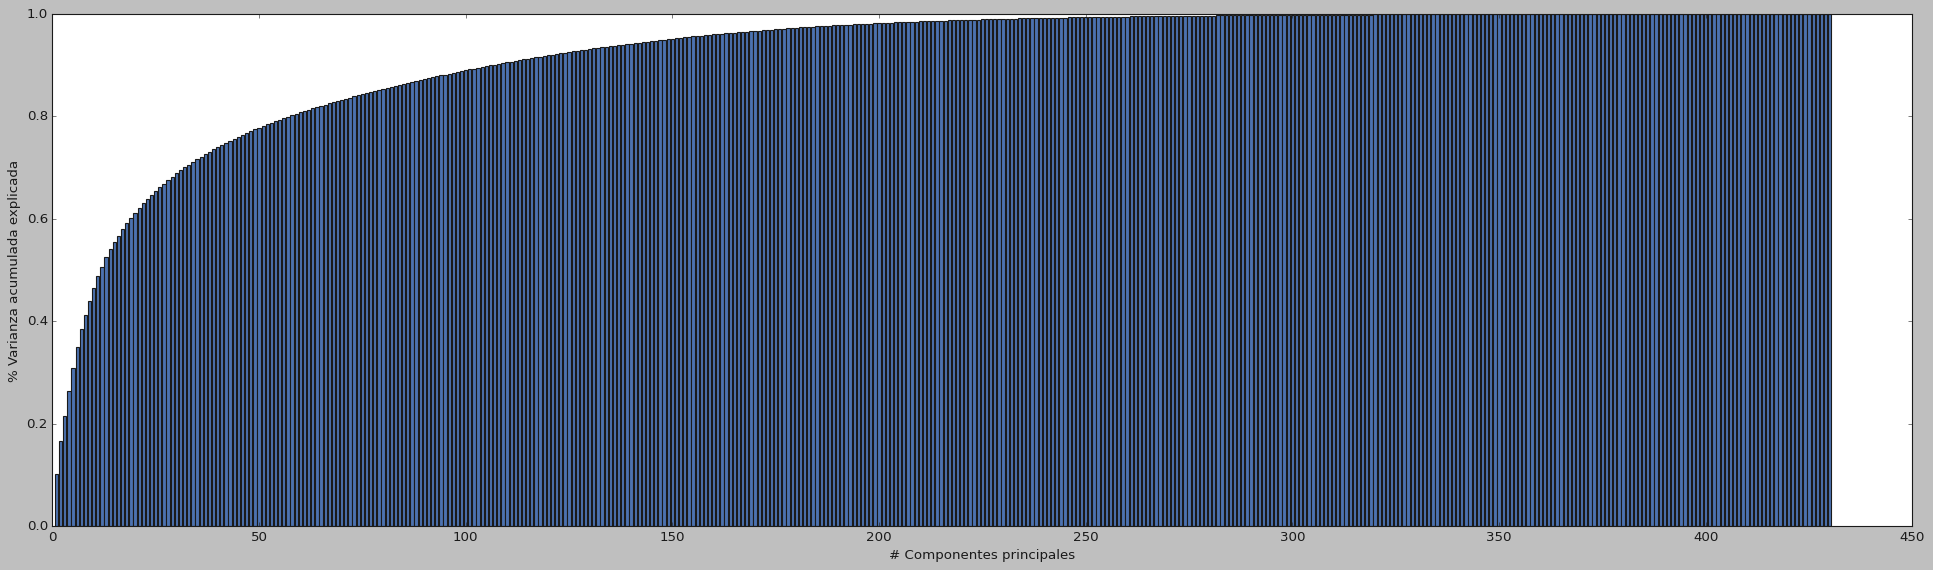

In [ ]:
# Calculate cumulative explained variance across all PCs
plt.style.use('classic')
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(30,8))
ax.bar(range(1,431), cum_exp_var)
ax.set_xlabel('# Componentes principales')
ax.set_ylabel('% Varianza acumulada explicada');

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

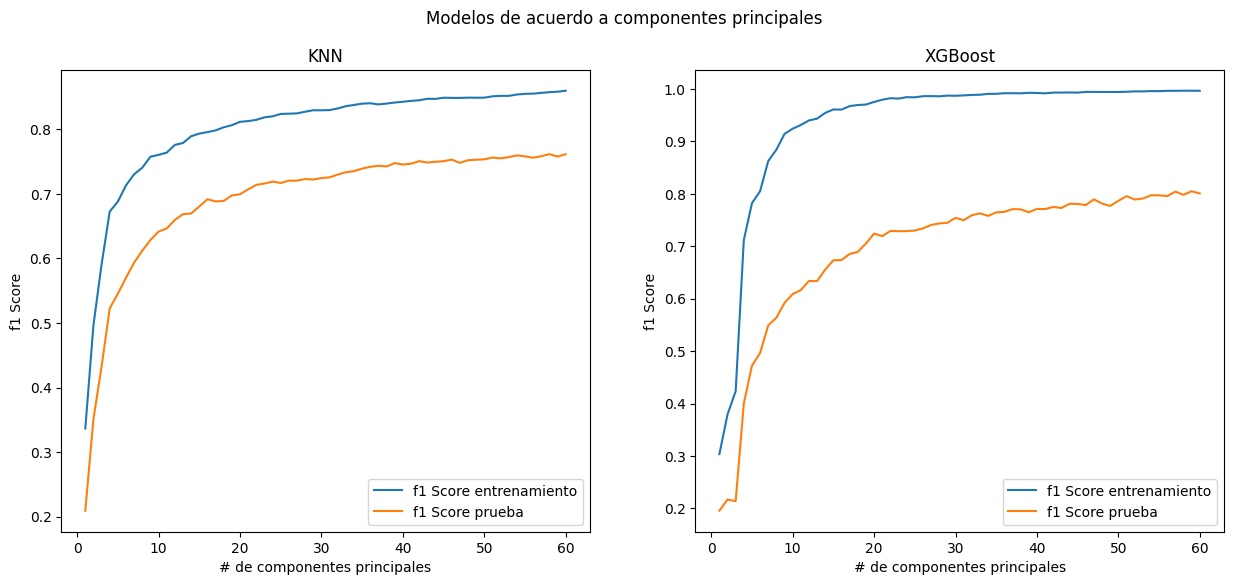

In [ ]:
#1h 20 min
plt.style.use('default')

knntrain_f1, xgtrain_f1 = [],[]
kntest_f1,xgtest_f1 = [],[]


for i in range(60):
    
    X = X_pca[:,0:i+1]
    #print(i)
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                        test_size=0.25,
                                                        random_state=42)


    # Fit k-NN classifier and make predictions
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    knntrain_f1.append(f1_score(y_train, y_pred_train))
    kntest_f1.append(f1_score(y_test, y_pred_test))

    #Fit with XGBoost
    xgb=XGBClassifier(eta=0.01,scale_pos_weight = 1,reg_alpha= 0.05, stopping_metric='log_loss',keep_cross_validation_predictions=True, objective='binary:logistic', nfolds=3, seed= -1,max_depth= 15,gamma=0.0,colsample_bytree =0.6,subsample=0.6)
    xgb.fit(X_train, y_train)
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)
    xgtrain_f1.append(f1_score(y_train, y_pred_train))
    xgtest_f1.append(f1_score(y_test, y_pred_test))

# Plot accuracy by n_neighbors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Modelos de acuerdo a componentes principales')
ax1.set_title('KNN')
ax1.plot(range(1,61), knntrain_f1, label='f1 Score entrenamiento' )
ax1.plot(range(1,61), kntest_f1, label='f1 Score prueba')
ax1.set_ylabel('f1 Score')
ax1.set_xlabel('# de componentes principales')
ax1.legend()
#plot 2
ax2.set_title('XGBoost')
ax2.plot(range(1,61), xgtrain_f1, label='f1 Score entrenamiento')
ax2.plot(range(1,61), xgtest_f1, label='f1 Score prueba')
ax2.set_ylabel('f1 Score')
ax2.set_xlabel('# de componentes principales')
ax2.legend()
plt.show()

In [ ]:
X = X_pca[:,0:60]
     
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=42)



# Fit k-NN classifier and make predictions
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))
print('--'*60)
xgb=XGBClassifier(eta=0.1,scale_pos_weight = 1,reg_alpha= 0.05, stopping_metric='log_loss',keep_cross_validation_predictions=True, objective='binary:logistic', nfolds=3, seed= -1,max_depth= 15,gamma=0.0,colsample_bytree =0.6,subsample=0.6)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
print(f'XGB Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'XGB Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.8597831211692598
Test f1 Score: 0.7614273075788853
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17827
           1       0.75      0.77      0.76      1679

    accuracy                           0.96     19506
   macro avg       0.87      0.87      0.87     19506
weighted avg       0.96      0.96      0.96     19506

------------------------------------------------------------------------------------------------------------------------
XGB Train f1 Score: 0.9964998581023555
XGB Test f1 Score: 0.800695652173913
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17827
           1       0.96      0.69      0.80      1679

    accuracy                           0.97     19506
   macro avg       0.97      0.84      0.89     19506
weighted avg       0.97      0.97      0.97     19506



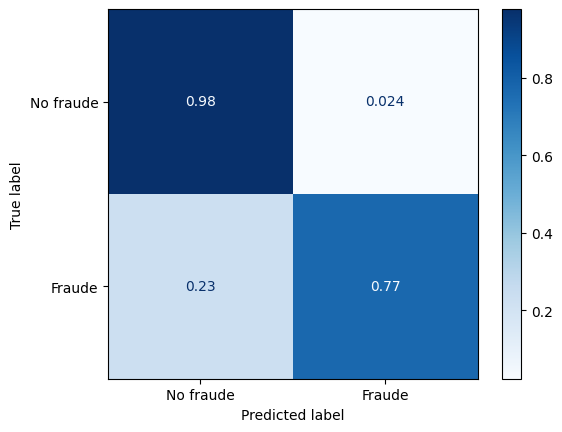

In [ ]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['No fraude',
                                                          'Fraude'],
                     normalize='true', cmap='Blues');

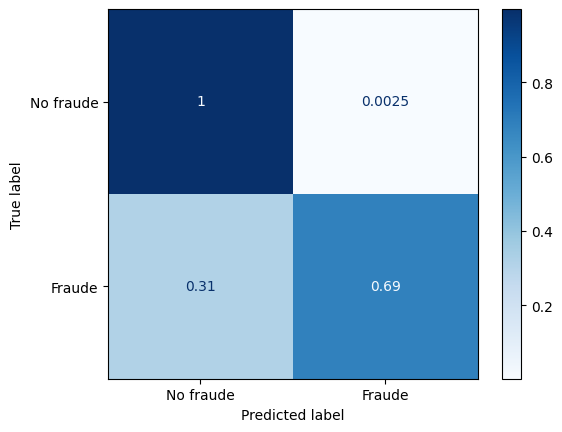

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['No fraude',
                                                          'Fraude'],
                     normalize='true', cmap='Blues');

In [ ]:
pca = PCA(n_components=60)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
X_new = pca.inverse_transform(X_pca)
dfX = pd.DataFrame(X_new)
dfpca = pd.DataFrame(X_pca)

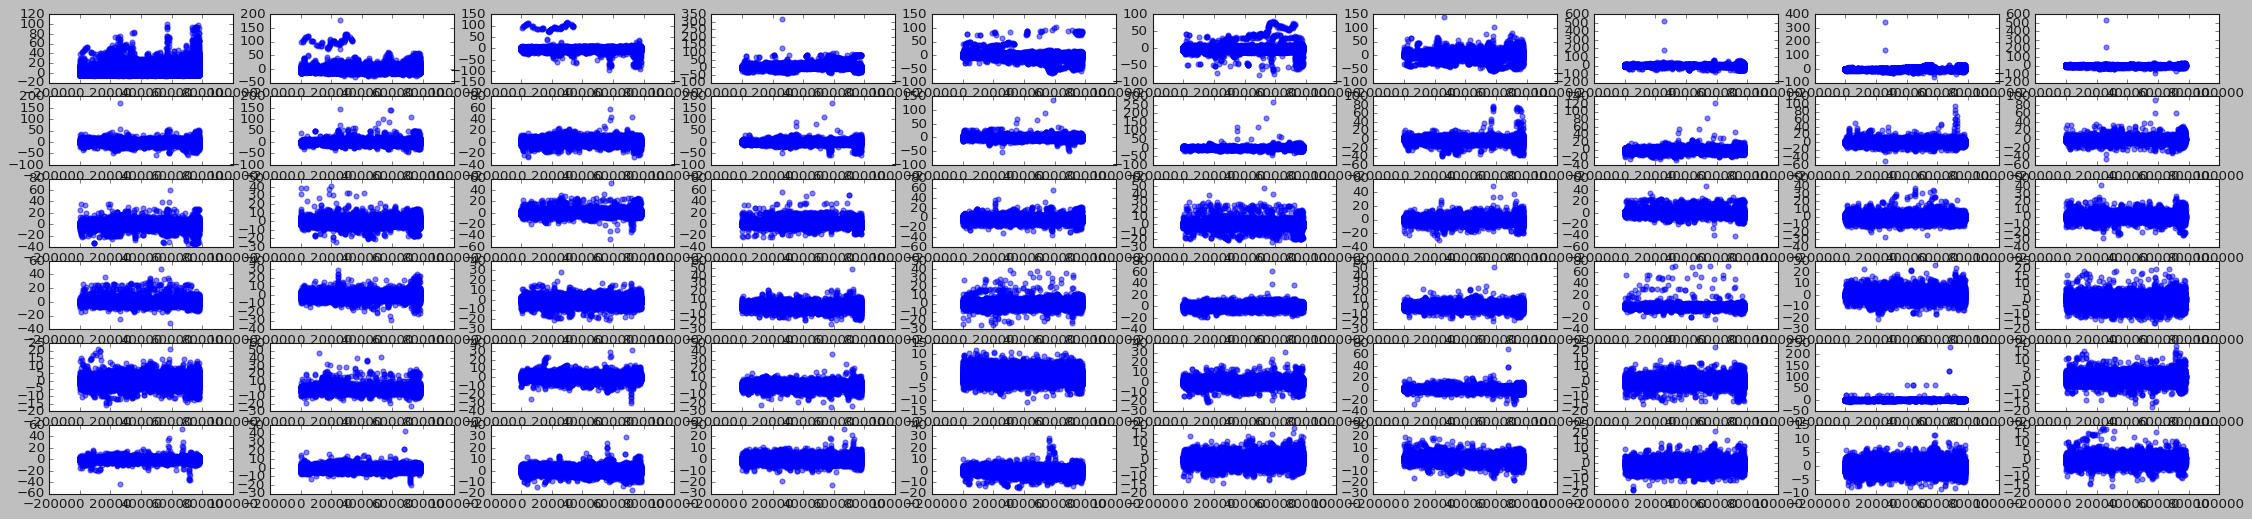

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(35, 55)) 
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i in dfX.columns:
    #plt.figure()
    #plt.subplot(86, 5, i+1)
    x=np.arange(len(dfX[i]))
    
    plt.subplot(43, 10, i+1)
    plt.scatter(x,dfX[i], alpha=.5, color='blue')
    #ax.scatter(x,dfpca[i],alpha=0.4)

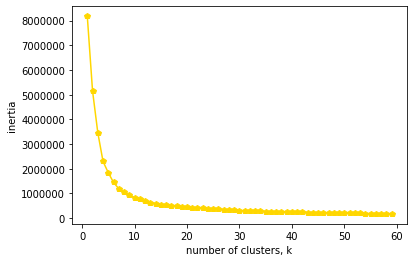

In [ ]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,60):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(dfpca.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,60), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.ticklabel_format(useOffset=False, style='plain')

#plt.xticks(ks)
plt.show()

In [ ]:
nclusters=2
model = KMeans(n_clusters=nclusters)
model.fit(dfpca.iloc[:,:2])



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = model.predict(dfpca.iloc[:,:2])

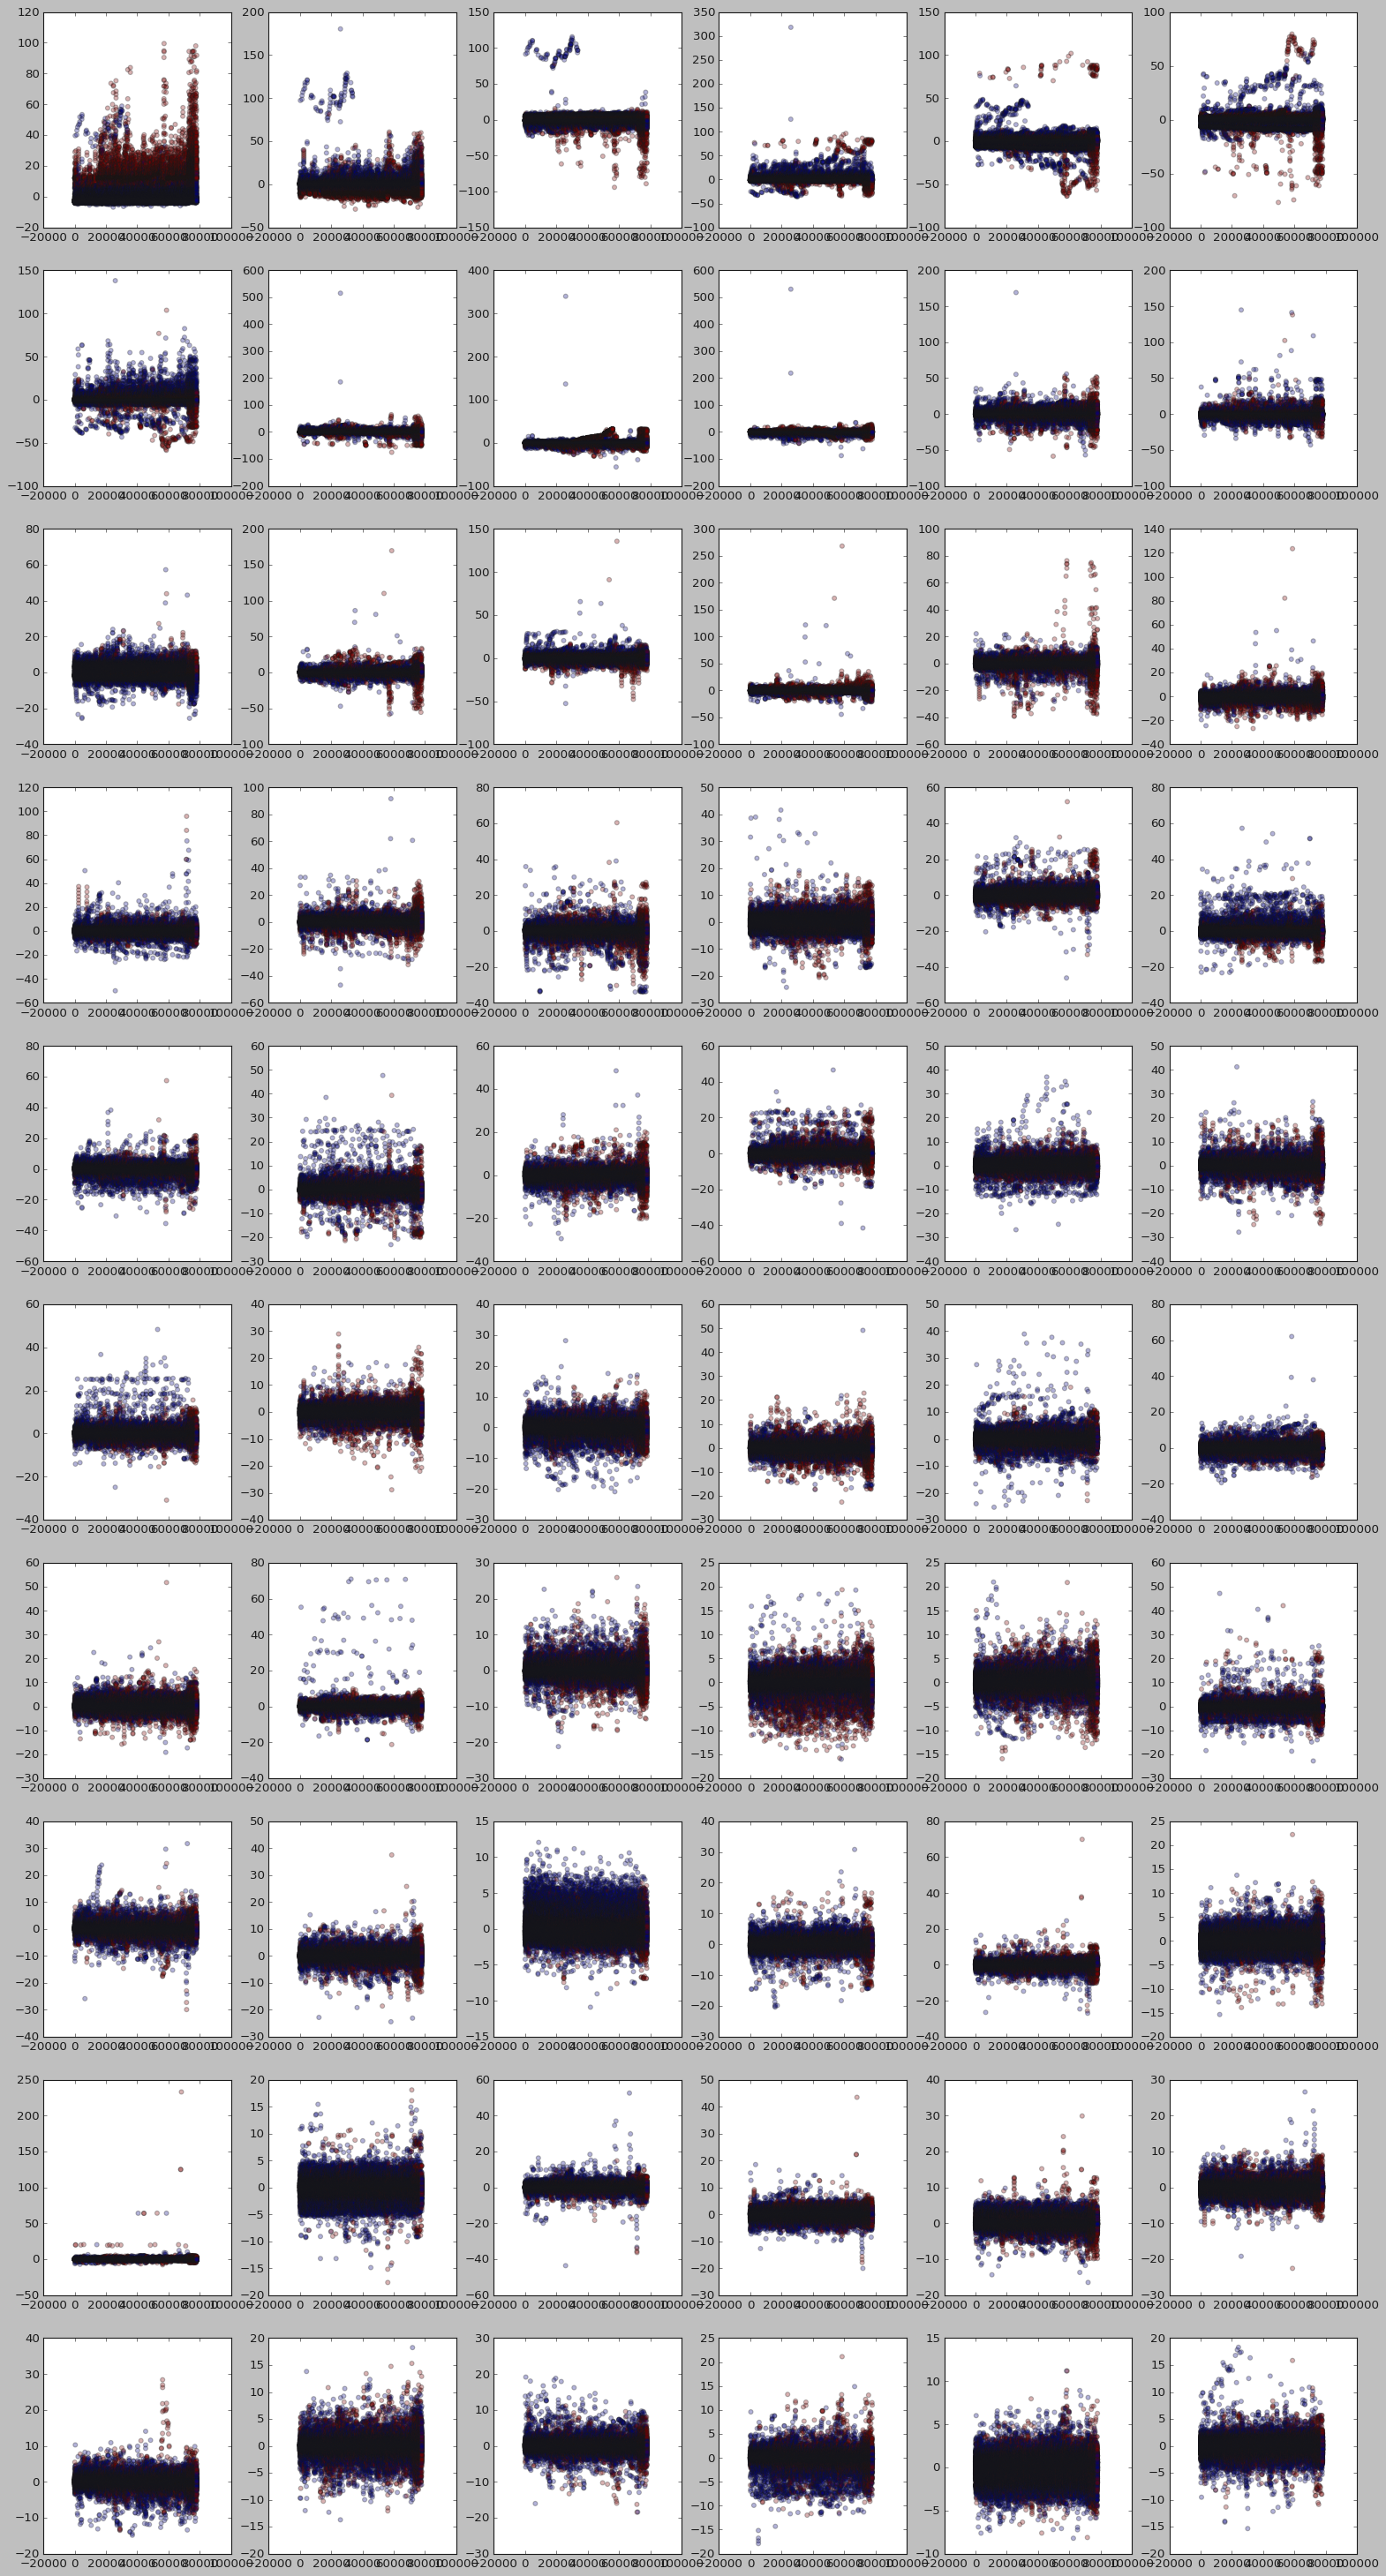

In [ ]:
#plt.scatter(dfpca[0], dfpca[1], c=labels)
#plt.show()
plt.style.use('classic')
plt.figure(figsize=(24, 45)) 
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i in dfpca.columns:
    #plt.figure()
    #plt.subplot(86, 5, i+1)
    x=np.arange(len(dfpca[i]))
    
    plt.subplot(10, 6, i+1)
    plt.scatter(x,dfpca[i], alpha=0.3, c=labels)
    #ax.scatter(x,dfpca[i],alpha=0.4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfpca, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train, X_test, y_train, y_test, "PCA", "PCA con 60 componentes")

---Método de trabajo: PCA---
---Observando comportamiendo de métricas para PCA con 60 componentes---
The accuracy score of Random Forest: 0.9667281861991183
The ROC_AUC score of Random Forest: 0.8198273660258196
The F1 score of Random Forest: 0.8786168853816716
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9718035476263713
The ROC_AUC score of Gradient Boosting: 0.8505018226989876
The F1 score of Gradient Boosting: 0.9718035476263713
---------------------------------------------------
The accuracy score of XGBoost: 0.9324823131344202
The ROC_AUC score of XGBoost: 0.6362794495526454
The F1 score of XGBoost: 0.9324823131344202
---------------------------------------------------
The accuracy score of Regresión logística: 0.9284322772480262
The ROC_AUC score of Regresión logística: 0.6224356444072938
The F1 score of Regresión logística: 0.9284322772480262
---------------------------------------------------
The accuracy score of Naive Bayes: 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

In [ ]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 10.3 MB 8.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


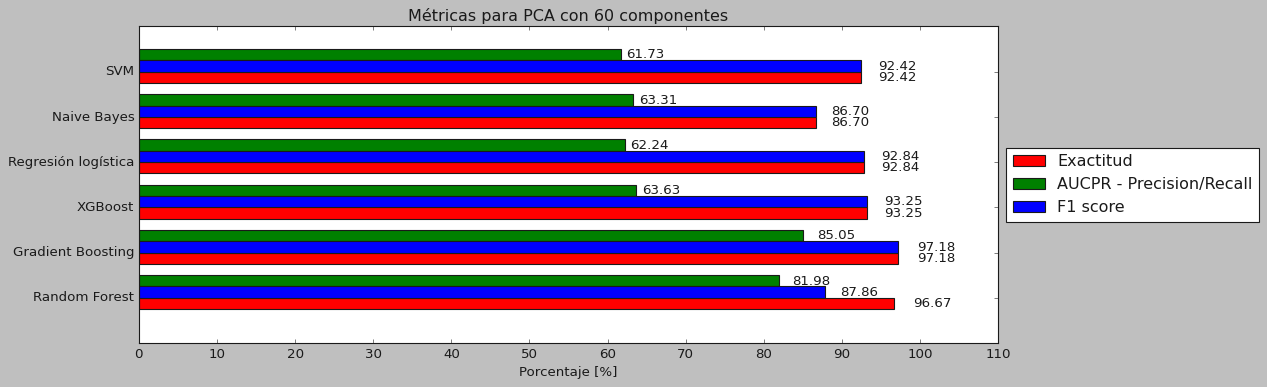

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para PCA con 60 componentes')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
impresión_reporte(nclusters,Y,labels)

Reporte de métricas para KMeans con clusters = 2
--------------------------------------------------------------------------------
Log_loss = 4.720739826369032
Puntuación de exactitud = 0.8633223536649449
Puntuación de sensibilidad = 0.3275096663325218
Puntuación de precisión = 0.2770442156268928
Puntuación de Rand ajustado = 0.18767764137603327
Puntuación de Jaccard = 0.1765886804107791
Matriz de confusión = 
            Fraude:1  NoFraude:0
Fraude:1        2287        4696
NoFraude:0      5968       65072


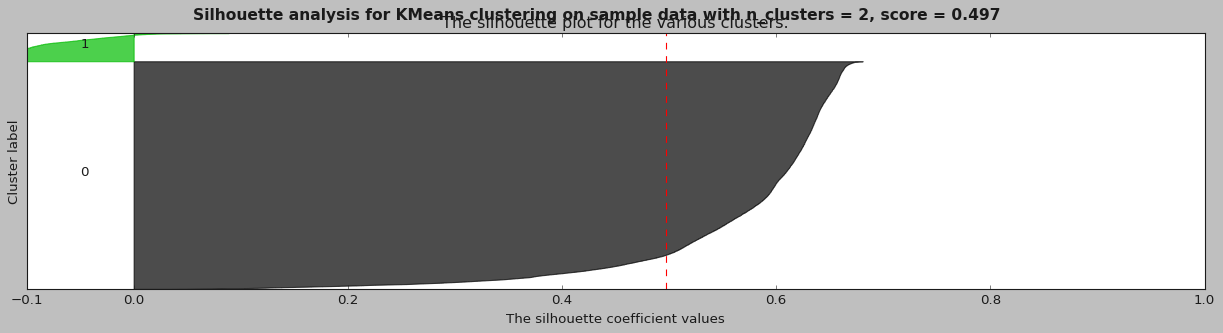

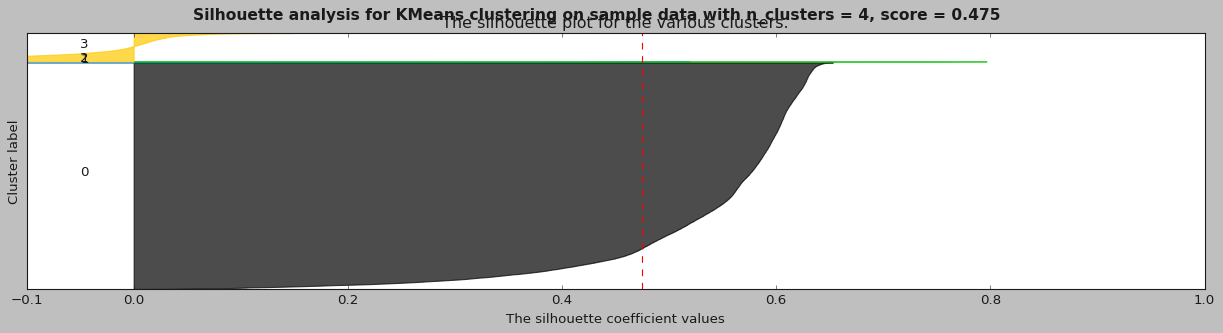

In [ ]:
range_n_clusters = [2, 4]
silhouette_analysis(dfpca, range_n_clusters)

## **B. PCA incremental** 

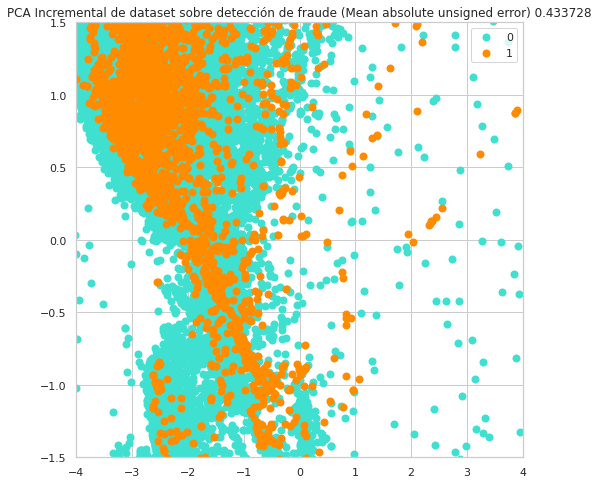

In [ ]:
n_components = 60
ipca = IncrementalPCA(n_components=n_components, batch_size=300)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['turquoise', 'darkorange']


plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1], target_n):
    plt.scatter(X_ipca[Y == i, 0], X_ipca[Y == i, 1],
                color=color, lw=2, label=target_name)
    err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
    plt.title("PCA Incremental de dataset sobre detección de fraude (Mean absolute unsigned error) "
              "%.6f" % err)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [ ]:
Xipca = pd.DataFrame(X_ipca)

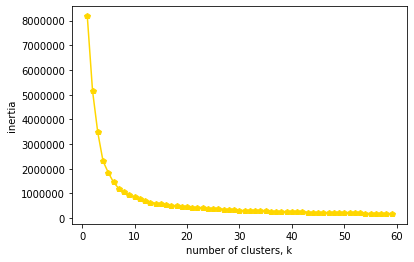

In [ ]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,60):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(Xipca.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,60), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.ticklabel_format(useOffset=False, style='plain')

#plt.xticks(ks)
plt.show()

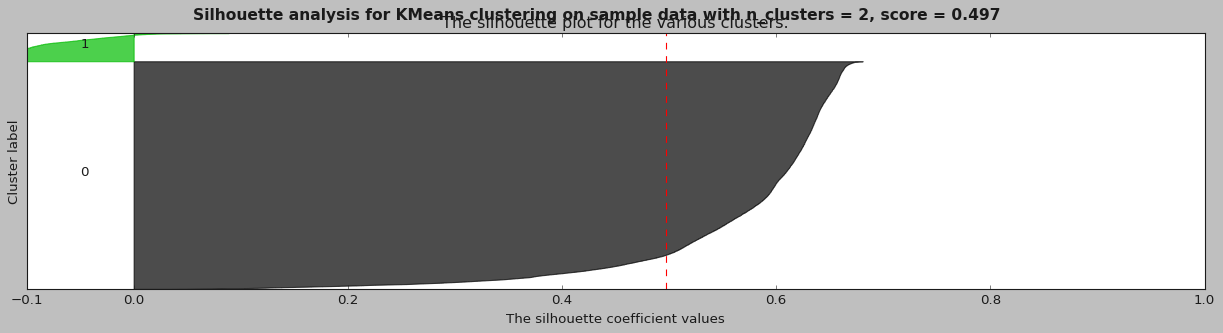

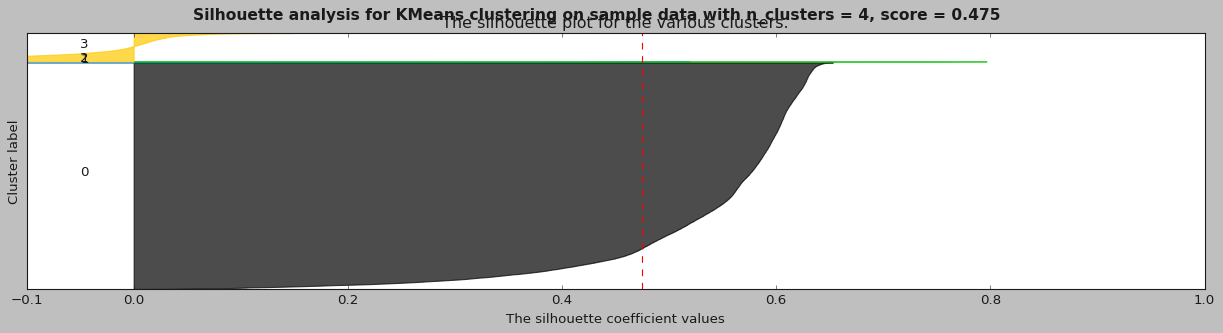

In [ ]:
range_n_clusters = [2, 4]
silhouette_analysis(Xipca, range_n_clusters)

In [ ]:
nclusters=2
model = KMeans(n_clusters=nclusters)
model.fit(Xipca.iloc[:,:2])
labels = model.predict(Xipca.iloc[:,:2])

In [ ]:
impresión_reporte(nclusters,Y,labels)

Reporte de métricas para KMeans con clusters = 2
--------------------------------------------------------------------------------
Log_loss = 4.720739826369032
Puntuación de exactitud = 0.8633223536649449
Puntuación de sensibilidad = 0.3275096663325218
Puntuación de precisión = 0.2770442156268928
Puntuación de Rand ajustado = 0.18767764137603327
Puntuación de Jaccard = 0.1765886804107791
Matriz de confusión = 
            Fraude:1  NoFraude:0
Fraude:1        2287        4696
NoFraude:0      5968       65072


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xipca, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
classifier_model(X_train, X_test, y_train, y_test, "Metrics", "PCA incremental con 60 componentes")

---Método de trabajo: Metrics---
---Observando comportamiendo de métricas para PCA incremental con 60 componentes---
The accuracy score of Random Forest: 0.9678560442940634
The ROC_AUC score of Random Forest: 0.8261274805733568
The F1 score of Random Forest: 0.9678560442940634
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9729314057213165
The ROC_AUC score of Gradient Boosting: 0.8552526431070245
The F1 score of Gradient Boosting: 0.9729314057213165
---------------------------------------------------
The accuracy score of XGBoost: 0.9332513072900646
The ROC_AUC score of XGBoost: 0.6382510409894431
The F1 score of XGBoost: 0.9332513072900646
---------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The accuracy score of Regresión logística: 0.9282784784168974
The ROC_AUC score of Regresión logística: 0.6174450868394167
The F1 score of Regresión logística: 0.9282784784168974
---------------------------------------------------
The accuracy score of Naive Bayes: 0.8651696913770122
The ROC_AUC score of Naive Bayes: 0.6390795757097304
The F1 score of Naive Bayes: 0.8651696913770122
---------------------------------------------------
The accuracy score of SVM: 0.9237157797600738
The ROC_AUC score of SVM: 0.6035779658524503
The F1 score of Naive Bayes: 0.9237157797600738


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


([0.9678560442940634,
  0.9729314057213165,
  0.9332513072900646,
  0.9282784784168974,
  0.8651696913770122,
  0.9237157797600738],
 [0.8261274805733568,
  0.8552526431070245,
  0.6382510409894431,
  0.6174450868394167,
  0.6390795757097304,
  0.6035779658524503],
 [0.9678560442940634,
  0.9729314057213165,
  0.9332513072900646,
  0.9282784784168974,
  0.8651696913770122,
  0.9237157797600738],
 ['Random Forest',
  'Gradient Boosting',
  'XGBoost',
  'Regresión logística',
  'Naive Bayes',
  'SVM'])

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train, X_test, y_train, y_test, "PCA", "PCA incremental con 60 componentes")

---Método de trabajo: PCA---
---Observando comportamiendo de métricas para PCA incremental con 60 componentes---
The accuracy score of Random Forest: 0.9667281861991183
The ROC_AUC score of Random Forest: 0.8198273660258196
The F1 score of Random Forest: 0.8786168853816716
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9719573464575002
The ROC_AUC score of Gradient Boosting: 0.8498116350886968
The F1 score of Gradient Boosting: 0.9719573464575002
---------------------------------------------------
The accuracy score of XGBoost: 0.9324823131344202
The ROC_AUC score of XGBoost: 0.6362794495526454
The F1 score of XGBoost: 0.9324823131344202
---------------------------------------------------
The accuracy score of Regresión logística: 0.9284322772480262
The ROC_AUC score of Regresión logística: 0.6224356444072938
The F1 score of Regresión logística: 0.9284322772480262
---------------------------------------------------
The accuracy score of N

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

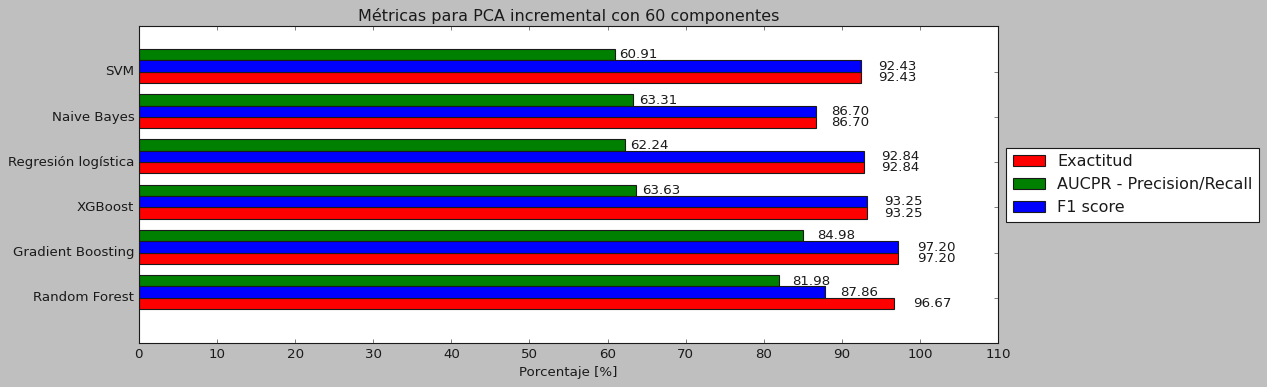

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para PCA incremental con 60 componentes')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

## **C. ICA - Independent Component Analysis**

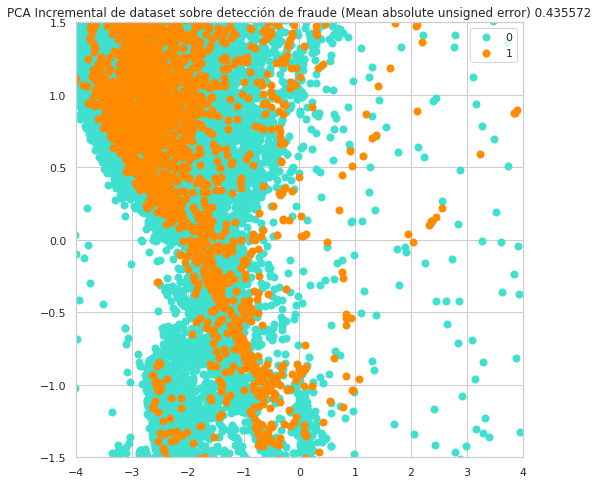

In [ ]:
n_components = 60
fpca = FastICA(n_components=n_components, max_iter=200)
Xfica = fpca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['turquoise', 'darkorange']


plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1], target_n):
    plt.scatter(X_ipca[Y == i, 0], X_ipca[Y == i, 1],
                color=color, lw=2, label=target_name)
    err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
    plt.title("PCA Incremental de dataset sobre detección de fraude (Mean absolute unsigned error) "
              "%.6f" % err)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [ ]:
Xica = pd.DataFrame(Xfica)

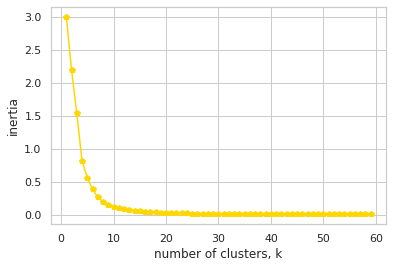

In [ ]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,60):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(Xica.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,60), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.ticklabel_format(useOffset=False, style='plain')

#plt.xticks(ks)
plt.show()

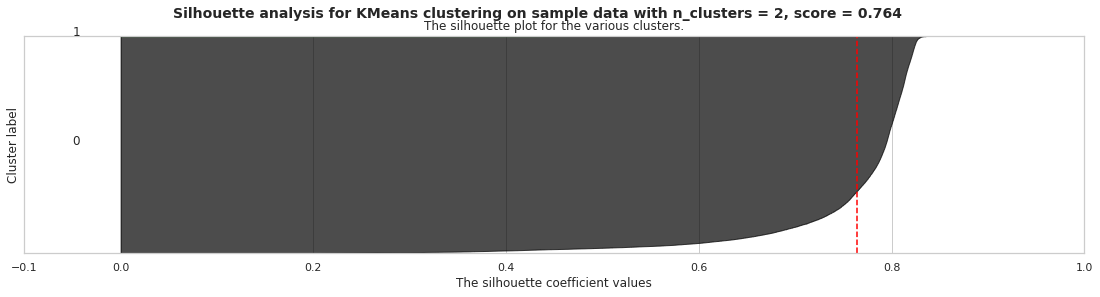

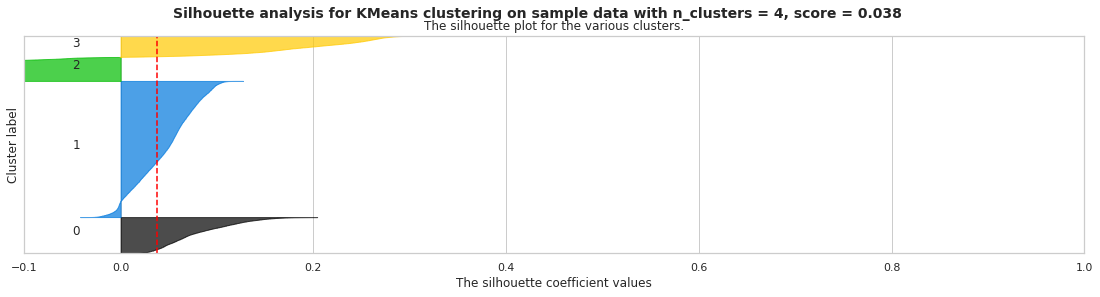

In [ ]:
range_n_clusters = [2, 4]
silhouette_analysis(Xica, range_n_clusters)

In [ ]:
nclusters=2
model = KMeans(n_clusters=nclusters)
model.fit(Xica.iloc[:,:2])
labels = model.predict(Xica.iloc[:,:2])

In [ ]:
impresión_reporte(nclusters,Y,labels)

Reporte de métricas para KMeans con clusters = 2
--------------------------------------------------------------------------------
Log_loss = 3.091637275439981
Puntuación de exactitud = 0.910487933045384
Puntuación de sensibilidad = 0.0
Puntuación de precisión = 0.0
Puntuación de Rand ajustado = -2.3111330865450983e-05
Puntuación de Jaccard = 0.0
Matriz de confusión = 
            Fraude:1  NoFraude:0
Fraude:1           0        6983
NoFraude:0         1       71039


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xica, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train, X_test, y_train, y_test, "PCA", "ICA con 60 componentes")

---Método de trabajo: PCA---
---Observando comportamiendo de métricas para ICA con 60 componentes---
The accuracy score of Random Forest: 0.9681636419563211
The ROC_AUC score of Random Forest: 0.8262963994922757
The F1 score of Random Forest: 0.8844427167724942
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9738541987080899
The ROC_AUC score of Gradient Boosting: 0.8583415567629485
The F1 score of Gradient Boosting: 0.9738541987080899
---------------------------------------------------
The accuracy score of XGBoost: 0.9303803957756588
The ROC_AUC score of XGBoost: 0.6206650916380299
The F1 score of XGBoost: 0.9303803957756588
---------------------------------------------------
The accuracy score of Regresión logística: 0.9104890802829898
The ROC_AUC score of Regresión logística: 0.5
The F1 score of Regresión logística: 0.9104890802829898
---------------------------------------------------
The accuracy score of Naive Bayes: 0.8668102122423

In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

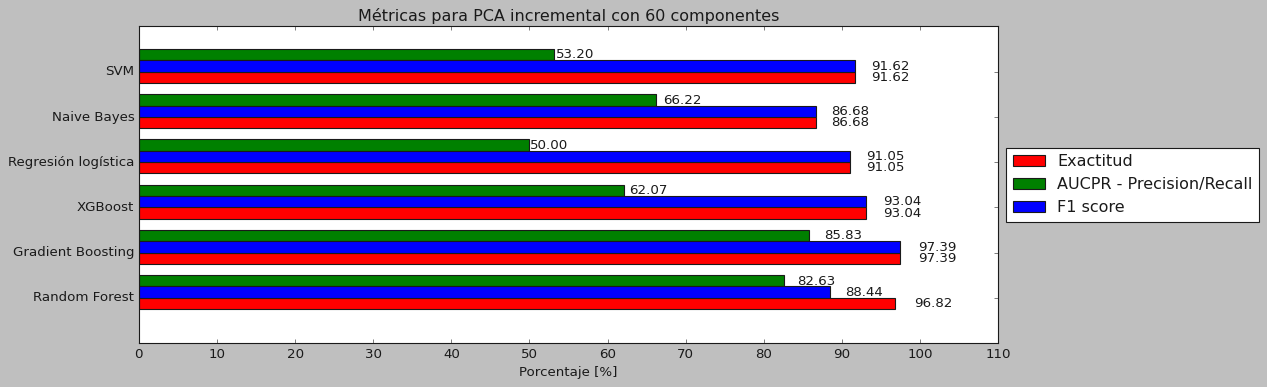

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para PCA incremental con 60 componentes')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# **5. Model selection**

## **A. SelectFromModel**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42, stratify=Y)

### **A.1. GradientBoosting**

In [ ]:
sel_rf=SelectFromModel(GradientBoostingClassifier(learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2))

sel_rf.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                     criterion='friedman_mse',
                                                     init=None,
                                                     learning_rate=0.1,
                                                     loss='deviance',
                                                     max_depth=20,
                                                     max_features=15,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                

In [ ]:
sel_rf.get_support()

array([ True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,

In [ ]:
print("Total number of features in the database: ", len(X_train.columns))
print("Total number of features after removing according to RF feature importances: ", sel_rf.get_support().sum())
print("Total features removed: ", int(len(X_train.columns)-sel_rf.get_support().sum()))

Total number of features in the database:  430
Total number of features after removing according to RF feature importances:  117
Total features removed:  313


In [ ]:
X_train_rfc=sel_rf.transform(X_train)
X_test_rfc=sel_rf.transform(X_test)

In [ ]:
X_train_rfc.shape, X_test_rfc.shape

((58517, 117), (19506, 117))

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "SelectFromModel", "Reducción de características")

---Método de trabajo: SelectFromModel---
---Observando comportamiendo de métricas para Reducción de características---
The accuracy score of Random Forest: 0.9810827437711473
The ROC_AUC score of Random Forest: 0.8979449165660505
The F1 score of Random Forest: 0.9363022947368516
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9853378447657131
The ROC_AUC score of Gradient Boosting: 0.9217135305408501
The F1 score of Gradient Boosting: 0.9853378447657131
---------------------------------------------------
The accuracy score of XGBoost: 0.9649851327796576
The ROC_AUC score of XGBoost: 0.811898335190861
The F1 score of XGBoost: 0.9649851327796576
---------------------------------------------------
The accuracy score of Regresión logística: 0.931405721316518
The ROC_AUC score of Regresión logística: 0.6467915080028482
The F1 score of Regresión logística: 0.931405721316518
---------------------------------------------------
The accuracy score o

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

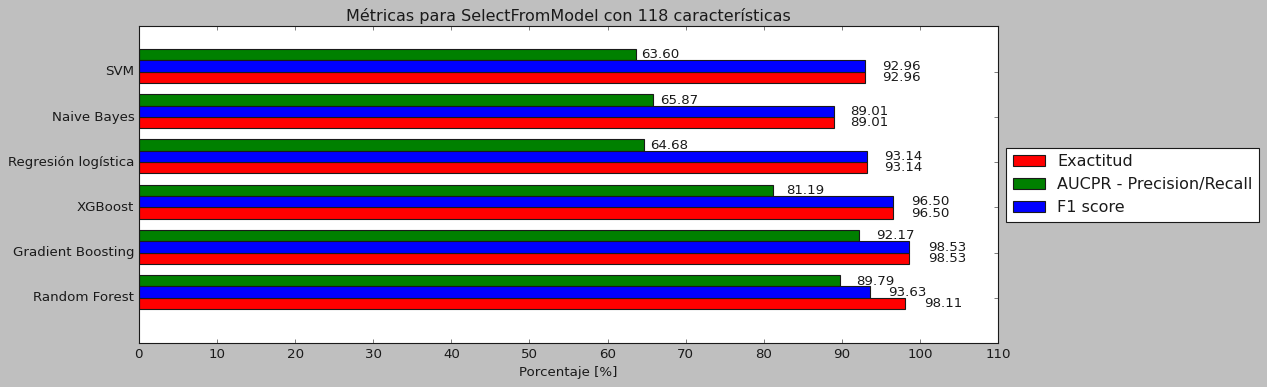

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para SelectFromModel con 118 características')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
classifier_model(X_train, X_test, y_train, y_test, "Random Forest Feature importance", "All Features")

KeyboardInterrupt: ignored

In [ ]:
model1 = GradientBoostingClassifier(random_state=40, learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2)
model1.fit(X_train_rfc,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=20,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

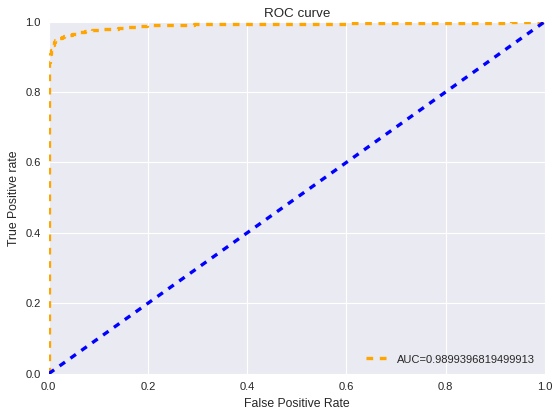

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
roc_curve_plot(model=model1,model_name='Gradient Boosting Classifier', ytest=y_test, xtest=X_test_rfc)

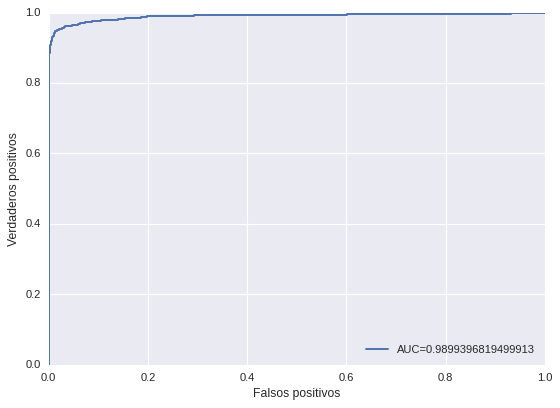

In [ ]:
y_pred_proba = model1.predict_proba(X_test_rfc)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.legend(loc=4)
plt.show()

In [ ]:
predic=model1.predict(X_test_rfc)
cm = confusion_matrix(y_test, predic)

In [ ]:
suma=[]
for i in cm: 
  suma.append(sum(i))
matrix=[]
matrix.append((cm[0]/suma[0])*100)
matrix.append((cm[1]/suma[1])*100)   

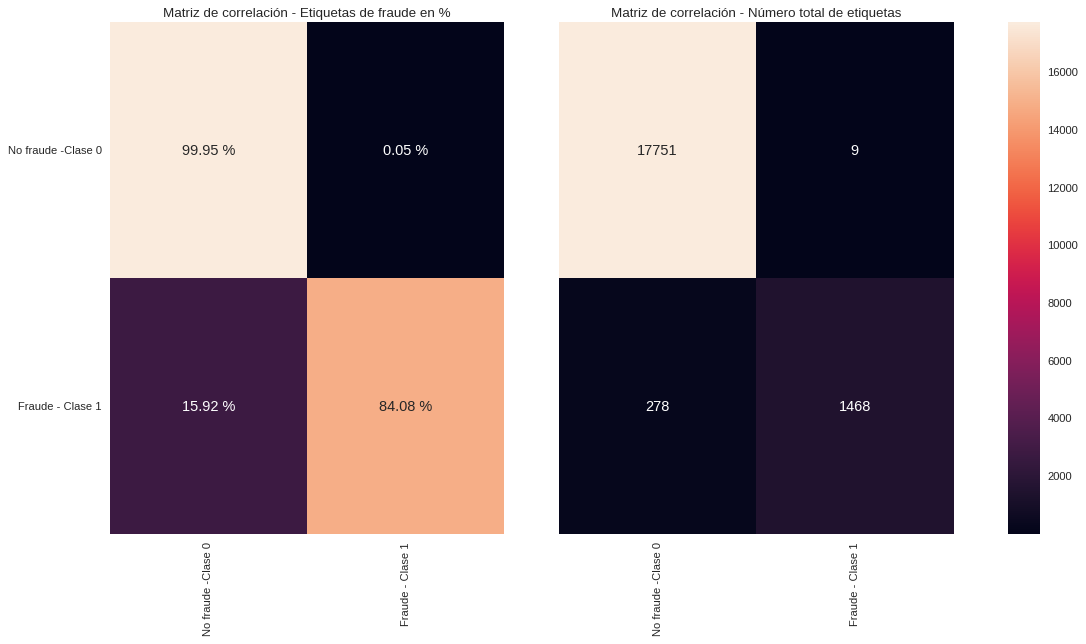

In [ ]:
x_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for x-axis
y_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for y-axis
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]},figsize=(15,8))
ax1.get_shared_y_axes().join(ax1,ax2)
map1=sns.heatmap(matrix, annot=True, fmt='.2f', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False,ax=ax1, annot_kws={"fontsize":13})
for t in map1.texts: t.set_text(t.get_text() + " %")
map1.set_ylabel('')
map1.set_xlabel('')
map1.title.set_text('Matriz de correlación - Etiquetas de fraude en %')
map2=sns.heatmap(cm, annot=True, fmt='d', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, annot_kws={"fontsize":13}, cbar_ax=axcb )
map2.set_ylabel('')
map2.set_xlabel('')
map2.set_yticks([])
map2.title.set_text('Matriz de correlación - Número total de etiquetas')

for ax in [map1,map2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

### **A.2. XGBoost**

In [ ]:
sel_rf=SelectFromModel(XGBClassifier(eta=0.01,scale_pos_weight = 1,reg_alpha= 0.05, stopping_metric='log_loss',keep_cross_validation_predictions=True, objective='binary:logistic', nfolds=3, seed= -1,max_depth= 15,gamma=0.0,colsample_bytree =0.6,subsample=0.6))

sel_rf.fit(X_train, y_train)

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        colsample_bylevel=1, colsample_bynode=1,
                                        colsample_bytree=0.6, eta=0.01,
                                        gamma=0.0,
                                        keep_cross_validation_predictions=True,
                                        learning_rate=0.1, max_delta_step=0,
                                        max_depth=15, min_child_weight=1,
                                        missing=None, n_estimators=100,
                                        n_jobs=1, nfolds=3, nthread=None,
                                        objective='binary:logistic',
                                        random_state=0, reg_alpha=0.05,
                                        reg_lambda=1, scale_pos_weight=1,
                                        seed=-1, silent=None,
                                        stopping_metric='log_loss',


In [ ]:
sel_rf.get_support()

array([False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [ ]:
print("Total number of features in the database: ", len(X_train.columns))
print("Total number of features after removing according to RF feature importances: ", sel_rf.get_support().sum())
print("Total features removed: ", int(len(X_train.columns)-sel_rf.get_support().sum()))

Total number of features in the database:  430
Total number of features after removing according to RF feature importances:  74
Total features removed:  356


In [ ]:
X_train_rfc=sel_rf.transform(X_train)
X_test_rfc=sel_rf.transform(X_test)

In [ ]:
X_train_rfc.shape, X_test_rfc.shape

((58517, 74), (19506, 74))

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "SelectFromModel", "Reducción de características")

---Método de trabajo: SelectFromModel---
---Observando comportamiendo de métricas para Reducción de características---
The accuracy score of Random Forest: 0.9799036193991593
The ROC_AUC score of Random Forest: 0.8991049038729452
The F1 score of Random Forest: 0.9330482554330862
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9804675484466318
The ROC_AUC score of Gradient Boosting: 0.9053535494257144
The F1 score of Gradient Boosting: 0.9804675484466318
---------------------------------------------------
The accuracy score of XGBoost: 0.9633958781913258
The ROC_AUC score of XGBoost: 0.8022462539859447
The F1 score of XGBoost: 0.9633958781913258
---------------------------------------------------
The accuracy score of Regresión logística: 0.9324310468573772
The ROC_AUC score of Regresión logística: 0.6434813357171605
The F1 score of Regresión logística: 0.9324310468573772
---------------------------------------------------
The accuracy scor

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

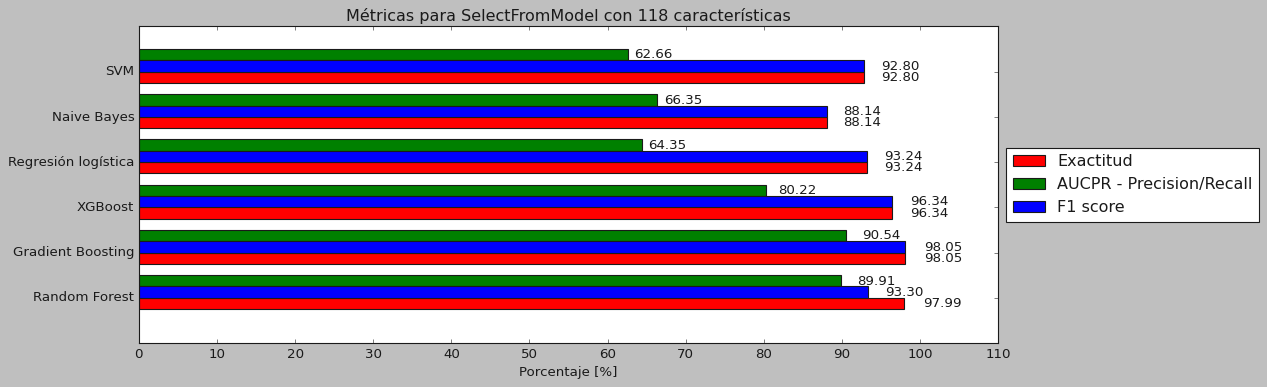

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para SelectFromModel con 118 características')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
classifier_model(X_train, X_test, y_train, y_test, "Random Forest Feature importance", "All Features")

---Feature Selection method: Random Forest Feature importance---
---Checking Accuracy with All Features---
The accuracy score of Random Forest: 0.9795447554598585
The accuracy score of Gradient Boosting: 0.9795447554598585


In [ ]:
model1 = XGBClassifier(eta=0.01,scale_pos_weight = 1,reg_alpha= 0.05, stopping_metric='log_loss',keep_cross_validation_predictions=True, objective='binary:logistic', nfolds=3, seed= -1,max_depth= 15,gamma=0.0,colsample_bytree =0.6,subsample=0.6)
model1.fit(X_train_rfc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.01, gamma=0.0,
              keep_cross_validation_predictions=True, learning_rate=0.1,
              max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nfolds=3, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0.05,
              reg_lambda=1, scale_pos_weight=1, seed=-1, silent=None,
              stopping_metric='log_loss', subsample=0.6, verbosity=1)

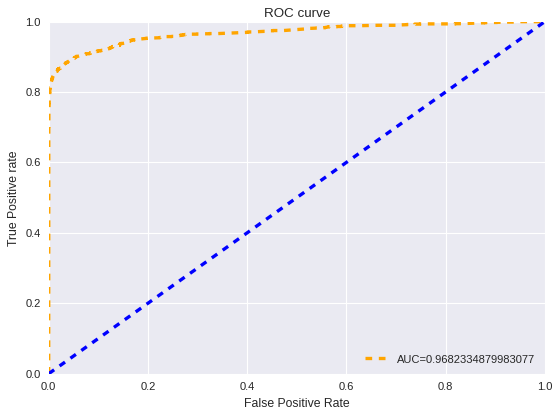

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
roc_curve_plot(model=model1,model_name='Gradient Boosting Classifier', ytest=y_test, xtest=X_test_rfc)

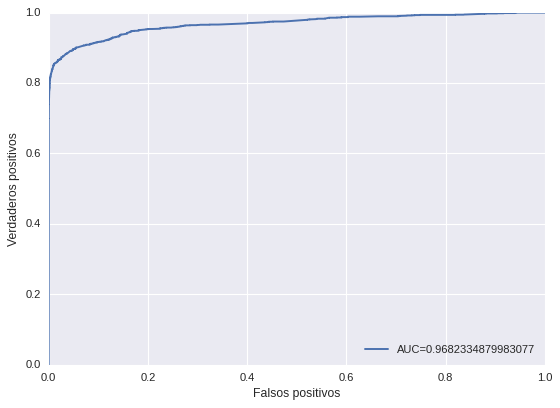

In [ ]:
y_pred_proba = model1.predict_proba(X_test_rfc)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.legend(loc=4)
plt.show()

In [ ]:
predic=model1.predict(X_test_rfc)
cm = confusion_matrix(y_test, predic)

In [ ]:
suma=[]
for i in cm: 
  suma.append(sum(i))
matrix=[]
matrix.append((cm[0]/suma[0])*100)
matrix.append((cm[1]/suma[1])*100)   

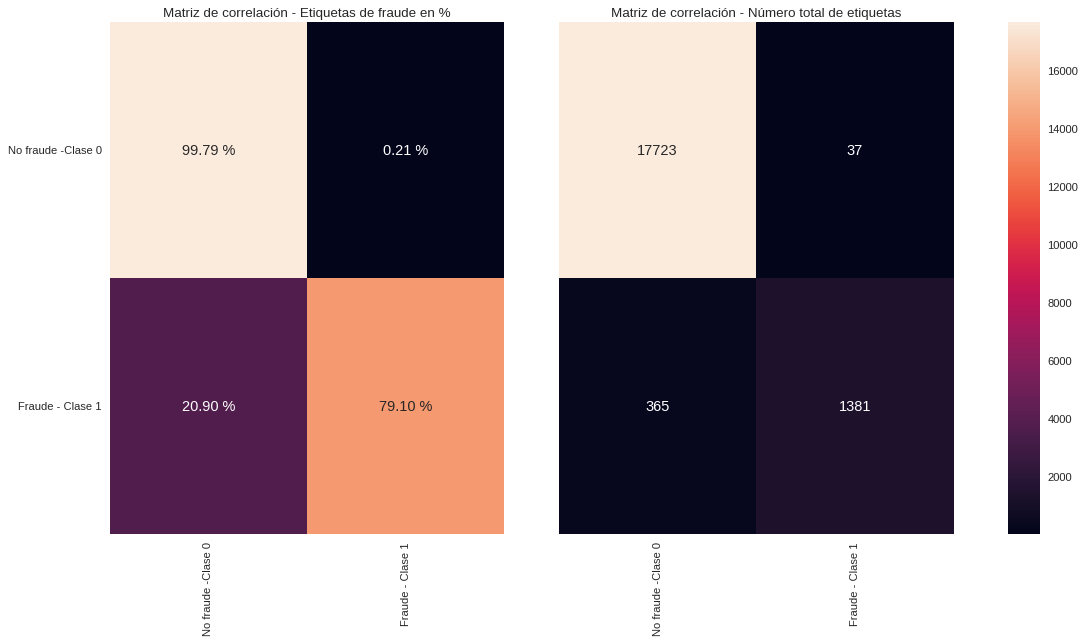

In [ ]:
x_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for x-axis
y_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for y-axis
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]},figsize=(15,8))
ax1.get_shared_y_axes().join(ax1,ax2)
map1=sns.heatmap(matrix, annot=True, fmt='.2f', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False,ax=ax1, annot_kws={"fontsize":13})
for t in map1.texts: t.set_text(t.get_text() + " %")
map1.set_ylabel('')
map1.set_xlabel('')
map1.title.set_text('Matriz de correlación - Etiquetas de fraude en %')
map2=sns.heatmap(cm, annot=True, fmt='d', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, annot_kws={"fontsize":13}, cbar_ax=axcb )
map2.set_ylabel('')
map2.set_xlabel('')
map2.set_yticks([])
map2.title.set_text('Matriz de correlación - Número total de etiquetas')

for ax in [map1,map2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

## **B. RFE**

### **B.1. GradientBoosting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2)
selector = RFE(estimator, n_features_to_select=120, step=5)
selector = selector.fit(X_train, y_train)

In [ ]:
print("Total number of features in the database: ", len(X_train.columns))
print("Total number of features after removing according to RF feature importances: ", selector.get_support().sum())
print("Total features removed: ", int(len(X_train.columns)-selector.get_support().sum()))

Total number of features in the database:  430
Total number of features after removing according to RF feature importances:  120
Total features removed:  310


In [ ]:
print(selector.ranking_)

[ 1  1  1  1  1 63 19  1  1  1  1 46 23 43 48  1  9 58 62 10  3 31 50 18
 16  1  1  1  1  1 15  1  1  1  1 57  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  9 24  1  1  1  1  7 35 10  1 63 56 40 33 21 51 15 59 42 27
 31  1  1 59 26 33 30 21  3  1 39 27 34 29  8  8 61 62 11 20 36 30 39 23
  9  2 17  1 15 24 62 41 30  2  1 45  6 12 14 24 20  5  1  1 32  1 28  1
 18 14  3  1 35 17 63 25  1 61 31  5 14  5 32 19  1  1 13  1 41 19 33  4
  1 37 21  1  1 61 61  9 16 35 40 50  1  1  1 22  4  6  1  1  1 32 15 28
 62 56 27 54 54 48 57 53 46 58 60 60 60 59 58 60 34 22 38  1  1  1  8  1
  1 13  1  1 36 28 36 59 30 17 49 51  4 24 14 54 37  1  1 12 22 34 40 16
  1  1 40 27 38 12 46 49 39 26 12  8 32 17 44  8 11 50 49 12  7 31 42 29
 29 47 52 49 50 52 57 48 36  1  1 47 56 44 55 47 46 54 10 37 39 29  1 19
  5 17 44 42 35 34 47 45 46 20 33 42 33 44 23  1 22 47  5  3 52 23 34 53
 35 38 25 26 38 18 24 28 48 40 48 43 29 62 63 36 10  1  1 52 53 51 52 18
 26 43 21 25  6 13  7  1  3 41 19 26 10 11  1 31  6

In [ ]:
X_train_rfc=selector.transform(X_train)
X_test_rfc=selector.transform(X_test)

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "RFE", "Reducción de características con 118 features")

---Método de trabajo: RFE---
---Observando comportamiendo de métricas para Reducción de características con 118 features---
The accuracy score of Random Forest: 0.9809802112170615
The ROC_AUC score of Random Forest: 0.8981468259496611
The F1 score of Random Forest: 0.9360311100171764
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9852865784886702
The ROC_AUC score of Gradient Boosting: 0.9193614361784466
The F1 score of Gradient Boosting: 0.9852865784886702
---------------------------------------------------
The accuracy score of XGBoost: 0.9658566594893879
The ROC_AUC score of XGBoost: 0.8149590956936319
The F1 score of XGBoost: 0.9658566594893879
---------------------------------------------------
The accuracy score of Regresión logística: 0.9296626678970573
The ROC_AUC score of Regresión logística: 0.6424774968267237
The F1 score of Regresión logística: 0.9296626678970573
---------------------------------------------------
The accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

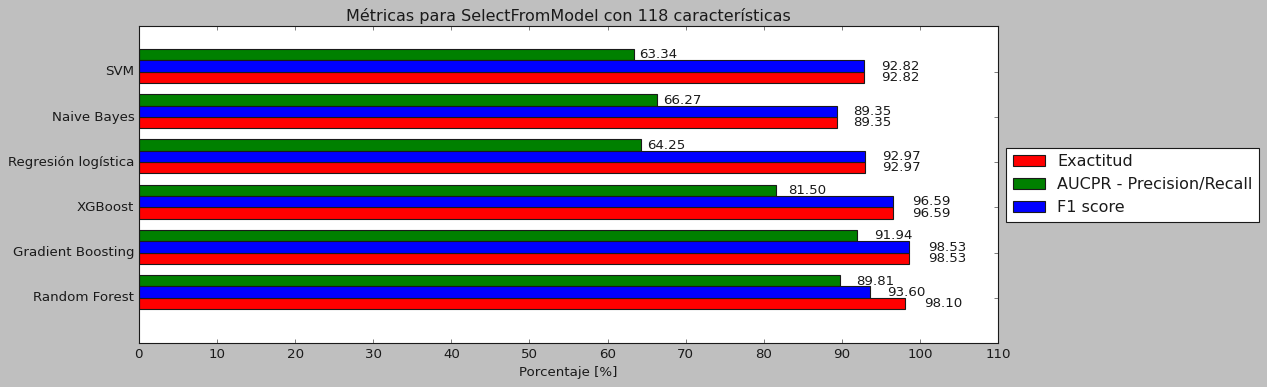

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para SelectFromModel con 118 características')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
model1 = GradientBoostingClassifier(random_state=40, learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2)
model1.fit(X_train_rfc,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=20,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

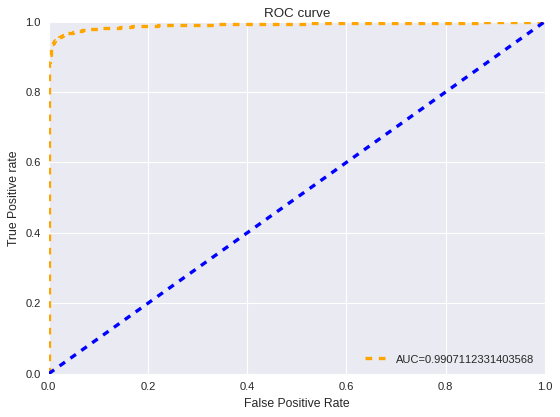

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
roc_curve_plot(model=model1,model_name='Gradient Boosting Classifier', ytest=y_test, xtest=X_test_rfc)

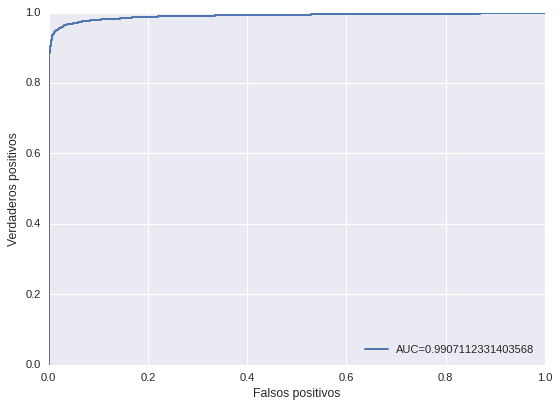

In [ ]:
y_pred_proba = model1.predict_proba(X_test_rfc)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.legend(loc=4)
plt.show()

In [ ]:
predic=model1.predict(X_test_rfc)
cm = confusion_matrix(y_test, predic)

In [ ]:
y_test.value_counts()

0    17760
1     1746
Name: isFraud, dtype: int64

In [ ]:
cm

array([[17753,     7],
       [  278,  1468]])

In [ ]:
suma=[]
for i in cm: 
  suma.append(sum(i))
matrix=[]
matrix.append((cm[0]/suma[0])*100)
matrix.append((cm[1]/suma[1])*100) 

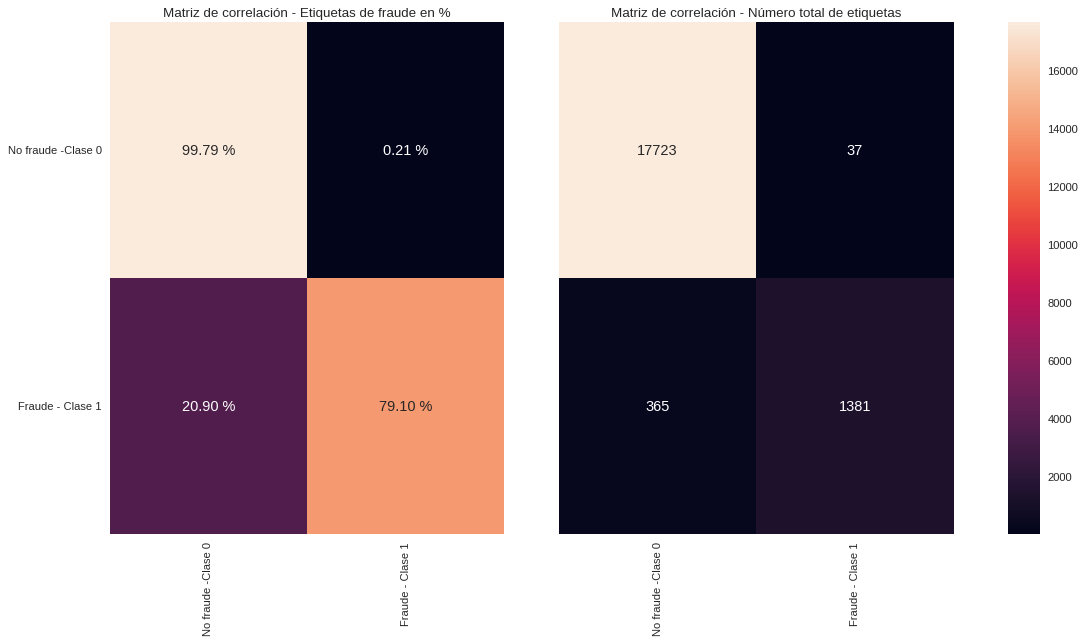

In [ ]:
x_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for x-axis
y_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for y-axis
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]},figsize=(15,8))
ax1.get_shared_y_axes().join(ax1,ax2)
map1=sns.heatmap(matrix, annot=True, fmt='.2f', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False,ax=ax1, annot_kws={"fontsize":13})
for t in map1.texts: t.set_text(t.get_text() + " %")
map1.set_ylabel('')
map1.set_xlabel('')
map1.title.set_text('Matriz de correlación - Etiquetas de fraude en %')
map2=sns.heatmap(cm, annot=True, fmt='d', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, annot_kws={"fontsize":13}, cbar_ax=axcb )
map2.set_ylabel('')
map2.set_xlabel('')
map2.set_yticks([])
map2.title.set_text('Matriz de correlación - Número total de etiquetas')

for ax in [map1,map2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

### **B.2. XGBoost**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
estimator = XGBClassifier(eta=0.01,scale_pos_weight = 1,reg_alpha= 0.05, stopping_metric='log_loss',keep_cross_validation_predictions=True, objective='binary:logistic', nfolds=3, seed= -1,max_depth= 15,gamma=0.0,colsample_bytree =0.6,subsample=0.6)
selector = RFE(estimator, n_features_to_select=120, step=6)
selector = selector.fit(X_train, y_train)

In [ ]:
print("Total number of features in the database: ", len(X_train.columns))
print("Total number of features after removing according to RF feature importances: ", selector.get_support().sum())
print("Total features removed: ", int(len(X_train.columns)-selector.get_support().sum()))

Total number of features in the database:  430
Total number of features after removing according to RF feature importances:  120
Total features removed:  310


In [ ]:
print(selector.ranking_)

[ 1  1  1  1  1 49  1  1  1  1  1 37 34 30 37 18 20 47 51 11 28 23 35 18
  1 10  1  1  3  4 21 10 12  1  1 39  1  1  1  1  1  1  8  1  1  1  1  1
  1  8  3 13 15 34  8 21  1  6  1 28 16  1 49 40 25  1  3 16  1 47 36  7
 40  1  8 50 22 23  2 26  8  1 40 29  6 17 18  1 53 53  1  1 40 32 39 48
 25  4 23  1 16 14 53 38  5  1  1 29 11  1  1  5  1  1  1  1 27  1  1  1
 31 31  1  1  7 22 53  5  1 48  4  1 10 30 46  1  2  1 16  1 32 32 38  7
  1 31  9  1  1 51 52  7 31 27 43 51 15 12 11 35 14  1  1  1 25  1  1  1
 50 39  1 38 49 37 51 46 23 51 50 49 50 46 53 46 41 19 34 28 24 25 20 22
 17 17 12 27 34 27 18 44  3  1  1 13  1  1  1 10  1  1  1 21  2  1  1 30
  1  1 33 39 30 12  1 11 30 19  2  7 36 29 40  5 33  1 17  1  1 41 23 29
 44 32 44 46 37 41 45 17 24  1  1 43 42 17 50 49 45 12  1 19 36 25 42 38
 35 28 29 38  1 44 31 48 39 15 45 40 29 34 21 28 42 39 24 26  1 10  9 43
  1 34 19 33 36 37 35  6 20 45 47 15 14 52 52 36  1 18  1 42 53  8 43 22
 16 19 41 20 48 20  1  1  1 26  1 32 27 21 30  9 10

In [ ]:
X_train_rfc=selector.transform(X_train)
X_test_rfc=selector.transform(X_test)

In [ ]:
X_train_rfc

array([[ 0.73599952,  0.62840056,  0.70259313, ..., -0.29590698,
        -0.2668366 , -0.67078402],
       [-0.58868711,  0.62840056, -1.42171513, ..., -0.29590698,
        -0.2668366 , -0.67078402],
       [ 0.73599952, -0.90489849,  0.70259313, ..., -0.29590698,
        -0.2668366 , -0.67078402],
       ...,
       [ 0.73599952,  0.62840056,  0.70259313, ..., -0.29590698,
        -0.2668366 , -0.67078402],
       [-1.25103043, -0.90489849, -1.42171513, ..., -0.29590698,
        -0.2668366 , -0.67078402],
       [ 0.73599952,  0.62840056,  0.70259313, ..., -0.29590698,
        -0.2668366 ,  0.84513554]])

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "RFE", "Reducción de características con 118 features")

---Método de trabajo: RFE---
---Observando comportamiendo de métricas para Reducción de características con 118 features---
The accuracy score of Random Forest: 0.9824156669742643
The ROC_AUC score of Random Forest: 0.9105548202842016
The F1 score of Random Forest: 0.9418982902805032
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9859017738131857
The ROC_AUC score of Gradient Boosting: 0.9277039604037026
The F1 score of Gradient Boosting: 0.9859017738131857
---------------------------------------------------
The accuracy score of XGBoost: 0.9656515943812161
The ROC_AUC score of XGBoost: 0.8132971889415188
The F1 score of XGBoost: 0.9656515943812161
---------------------------------------------------
The accuracy score of Regresión logística: 0.9312006562083461
The ROC_AUC score of Regresión logística: 0.6461624640104022
The F1 score of Regresión logística: 0.931200656208346
---------------------------------------------------
The accuracy 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

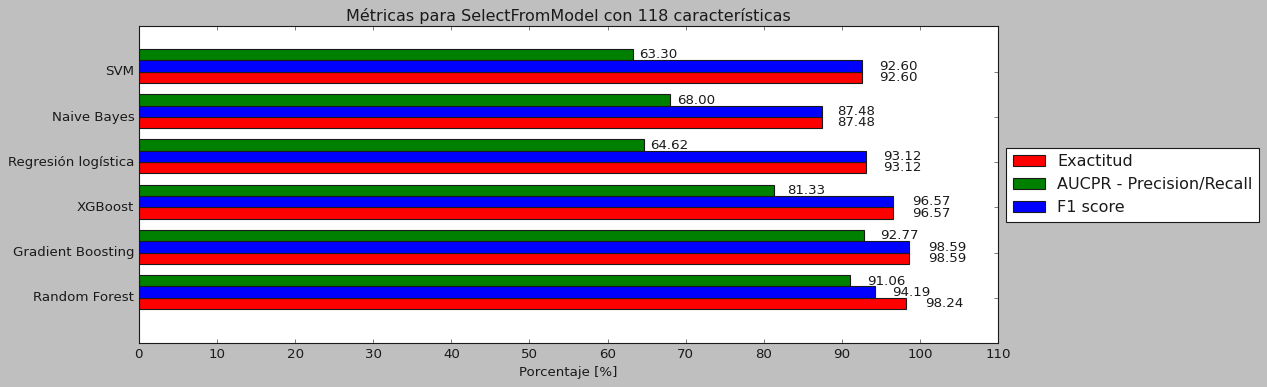

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para SelectFromModel con 118 características')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
model1 = XGBClassifier(eta=0.01,scale_pos_weight = 1,reg_alpha= 0.05, stopping_metric='log_loss',keep_cross_validation_predictions=True, objective='binary:logistic', nfolds=3, seed= -1,max_depth= 15,gamma=0.0,colsample_bytree =0.6,subsample=0.6)
model1.fit(X_train_rfc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.01, gamma=0.0,
              keep_cross_validation_predictions=True, learning_rate=0.1,
              max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nfolds=3, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0.05,
              reg_lambda=1, scale_pos_weight=1, seed=-1, silent=None,
              stopping_metric='log_loss', subsample=0.6, verbosity=1)

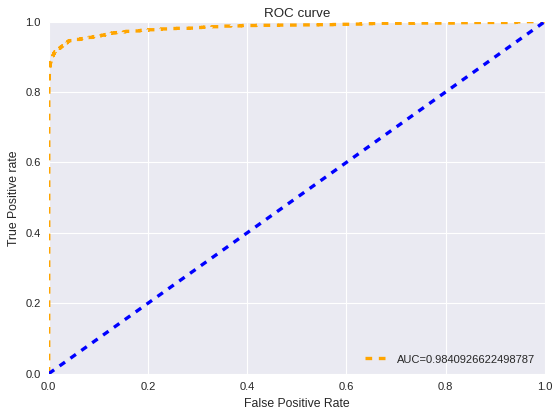

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
roc_curve_plot(model=model1,model_name='Gradient Boosting Classifier', ytest=y_test, xtest=X_test_rfc)

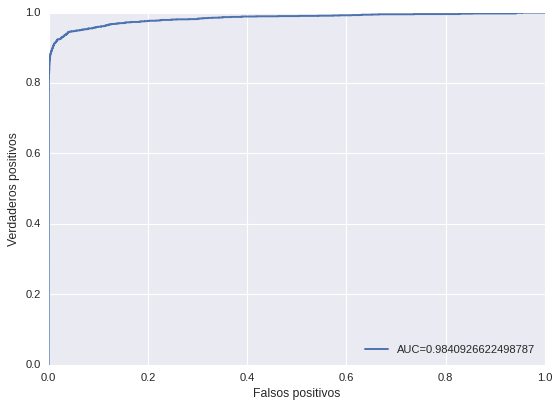

In [ ]:
y_pred_proba = model1.predict_proba(X_test_rfc)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.legend(loc=4)
plt.show()

In [ ]:
predic=model1.predict(X_test_rfc)
cm = confusion_matrix(y_test, predic)

In [ ]:
y_test.value_counts()

0    17760
1     1746
Name: isFraud, dtype: int64

In [ ]:
cm

array([[17739,    21],
       [  278,  1468]])

In [ ]:
suma=[]
for i in cm: 
  suma.append(sum(i))
matrix=[]
matrix.append((cm[0]/suma[0])*100)
matrix.append((cm[1]/suma[1])*100) 

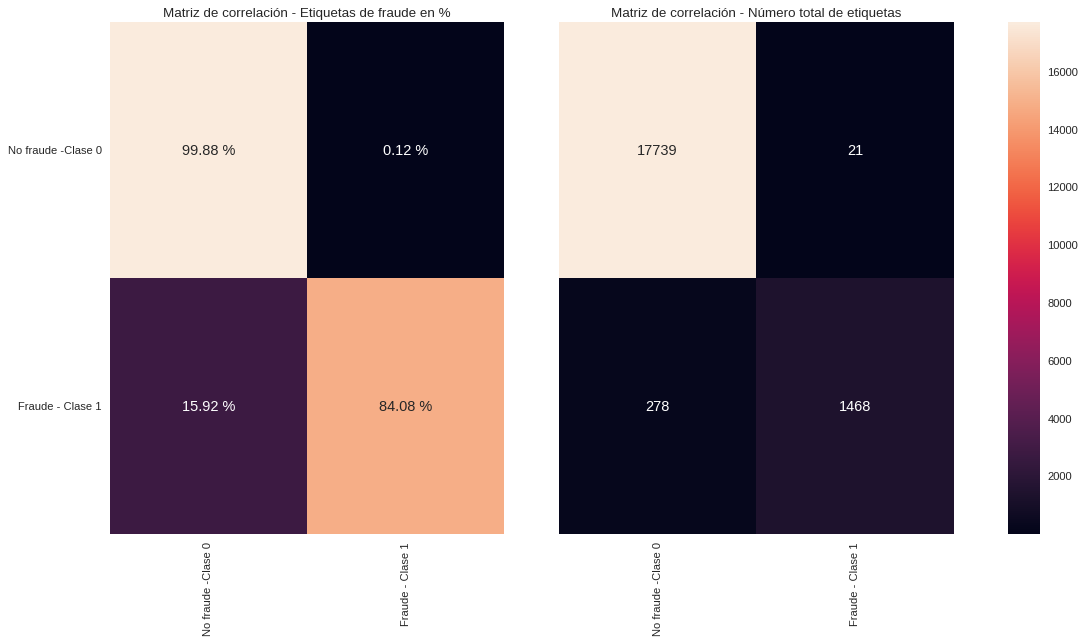

In [ ]:
x_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for x-axis
y_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for y-axis
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]},figsize=(15,8))
ax1.get_shared_y_axes().join(ax1,ax2)
map1=sns.heatmap(matrix, annot=True, fmt='.2f', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False,ax=ax1, annot_kws={"fontsize":13})
for t in map1.texts: t.set_text(t.get_text() + " %")
map1.set_ylabel('')
map1.set_xlabel('')
map1.title.set_text('Matriz de correlación - Etiquetas de fraude en %')
map2=sns.heatmap(cm, annot=True, fmt='d', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, annot_kws={"fontsize":13}, cbar_ax=axcb )
map2.set_ylabel('')
map2.set_xlabel('')
map2.set_yticks([])
map2.title.set_text('Matriz de correlación - Número total de etiquetas')

for ax in [map1,map2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

### **B.3. AutoML**

In [ ]:
xtr = pd.DataFrame(X_train_rfc)
# ytr= pd.DataFrame(y_train)
xte = pd.DataFrame(X_test_rfc)
# yte=pd.DataFrame(y_test)
xtr.index = y_train.index
train=pd.concat([xtr, y_train], axis=1)
xte.index = y_test.index
test= pd.concat([xte, y_test], axis=1)

In [ ]:
y_train.shape

(58517,)

In [ ]:
X_train_rfc.shape

(58517, 120)

In [ ]:
train

0         1         2  ...       118       119  isFraud
39635  0.736000  0.628401  0.702593  ... -0.266837 -0.670784        0
3144  -0.588687  0.628401 -1.421715  ... -0.266837 -0.670784        0
24582  0.736000 -0.904898  0.702593  ... -0.266837 -0.670784        0
38836  0.736000 -0.904898  0.702593  ... -0.266837 -0.670784        0
45008  0.736000  0.628401  0.702593  ... -0.266837  0.845136        0
...         ...       ...       ...  ...       ...       ...      ...
28736  0.736000 -0.904898  0.702593  ... -0.266837  0.845136        0
50560  0.736000  0.628401  0.702593  ... -0.266837  0.845136        0
47203  0.736000  0.628401  0.702593  ... -0.266837 -0.670784        0
14435 -1.251030 -0.904898 -1.421715  ... -0.266837 -0.670784        0
38422  0.736000  0.628401  0.702593  ... -0.266837  0.845136        0

[58517 rows x 121 columns]

In [ ]:
! pip install requests
! pip install tabulate
! pip install "colorama>=0.3.8"
! pip install future

In [ ]:
! pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 175.8 MB 21 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=1b63436da5a3269153d5b532a3280e578a2b45441ababd18e38c4e16e4a93fd7
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1w540c_z
  JVM stdout: /tmp/tmp1w540c_z/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1w540c_z/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.3
H2O_cluster_version_age:    17 days
H2O_cluster_name:           H2O_from_python_unknownUser_1k4plt
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

In [ ]:
hftrainss_01 = h2o.H2OFrame(train)
#hftest =h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
trainss_01, testss_01 = hftrainss_01.split_frame(ratios=[.7]) #mirar en diferentes proporciones 70/30 ... 

In [ ]:
xss_01 = trainss_01.columns
yss_01 = "isFraud"
xss_01.remove(yss_01)

In [ ]:
trainss_01[yss_01] = trainss_01[yss_01].asfactor()


In [ ]:
aml = H2OAutoML(max_runtime_secs = 3600*3, max_models=15, seed=1) 
#
aml.train(x=xss_01, y=yss_01, training_frame=trainss_01)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20211024_221023 0.984745 0.0502556 0.955226 0.065668 0.107261 0.011505 
 StackedEnsemble_AllModels_6_AutoML_1_20211024_221023 0.984723 0.0503043 0.955213 0.0657218 0.107339 0.0115216 
 StackedEnsemble_AllModels_2_AutoML_1_20211024_221023 0.984702 0.0505715 0.954869 0.0649575 0.107543 0.0115656 
 StackedEnsemble_AllModels_1_AutoML_1_20211024_221023 0.984669 0.0507556 0.954662 0.0649979 0.107922 0.0116471 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20211024_221023 0.984547 0.0508838 0.954368 0.0645197 0.107982 0.0116602 
 StackedEnsemble_BestOfFamily_7_AutoML_1_20211024_221023 0.984497 0.0509872 0.954257 0.0645197 0.108073 0.0116798 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20211024_221023 0.984176 0.0510817 0.95402 0.062198 0.107792 0.011619 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20211024_221023 0.984072 0.0513952 0.953756 0.065092 0.108399 0.0117504 
 GBM_4_AutoML_1_20211024_221023 0.983994 0.0547146 0.952559 0.0636654 0.112608 0.0126807 
 StackedEnsemble_AllModels_5_AutoML_1_20211024_221023 0.983747 0.0502976 0.955109 0.0603986 0.106451 0.0113318 
 StackedEnsemble_AllModels_4_AutoML_1_20211024_221023 0.983476 0.0517388 0.953444 0.062653 0.106716 0.0113883 
 GBM_3_AutoML_1_20211024_221023 0.983405 0.0549188 0.951682 0.067435 0.112829 0.0127305 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20211024_221023 0.983388 0.0548676 0.9499 0.0688774 0.112428 0.0126401 
 GBM_1_AutoML_1_20211024_221023 0.983249 0.0575679 0.948382 0.0662659 0.11602 0.0134606 
 StackedEnsemble_BestOfFamily_6_AutoML_1_20211024_221023 0.983163 0.0513487 0.953491 0.0601375 0.107022 0.0114537 
 GBM_2_AutoML_1_20211024_221023 0.982591 0.0558859 0.949833 0.0662965 0.113967 0.0129885 
 GBM_grid_1_AutoML_1_20211024_221023_model_1 0.982355 0.0586205 0.948419 0.0694209 0.117332 0.0137668 
 StackedEnsemble_BestOfFamily_5_AutoML_1_20211024_221023 0.982003 0.0529749 0.951133 0.0593597 0.107927 0.0116482 
 XGBoost_grid_1_AutoML_1_20211024_221023_model_2 0.980949 0.0582422 0.94663 0.0659779 0.115558 0.0133537 
 XGBoost_3_AutoML_1_20211024_221023 0.979788 0.0594347 0.943754 0.067877 0.116186 0.0134993 
 XGBoost_grid_1_AutoML_1_20211024_221023_model_1 0.979497 0.0605115 0.94266 0.0733751 0.117649 0.0138414 
 XGBoost_2_AutoML_1_20211024_221023 0.978073 0.0621149 0.940721 0.0736594 0.118685 0.014086 
 XGBoost_1_AutoML_1_20211024_221023 0.977471 0.06303 0.939415 0.0759505 0.119582 0.0142998 
 GBM_5_AutoML_1_20211024_221023 0.977425 0.0672423 0.93268 0.0722041 0.125282 0.0156957 
 XRT_1_AutoML_1_20211024_221023 0.971985 0.108037 0.898748 0.111248 0.164517 0.0270658 
 DRF_1_AutoML_1_20211024_221023 0.966703 0.111432 0.888739 0.122144 0.166775 0.0278139 
 DeepLearning_1_AutoML_1_20211024_221023 0.867627 0.198374 0.596501 0.260273 0.230093 0.0529428 
 GLM_1_AutoML_1_20211024_221023 0.85726 0.208147 0.556208 0.267359 0.237692 0.0564975

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id auc logloss aucpr mean_per_class_error rmse mse training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20211024_221023 0.984745 0.0502556 0.955226 0.065668 0.107261 0.011505 9057 0.350519 StackedEnsemble 
 StackedEnsemble_AllModels_6_AutoML_1_20211024_221023 0.984723 0.0503043 0.955213 0.0657218 0.107339 0.0115216 106893 0.322688 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20211024_221023 0.984702 0.0505715 0.954869 0.0649575 0.107543 0.0115656 9672 0.288026 StackedEnsemble 
 StackedEnsemble_AllModels_1_AutoML_1_20211024_221023 0.984669 0.0507556 0.954662 0.0649979 0.107922 0.0116471 8948 0.260198 StackedEnsemble 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20211024_221023 0.984547 0.0508838 0.954368 0.0645197 0.107982 0.0116602 6038 0.094737 StackedEnsemble 
 StackedEnsemble_BestOfFamily_7_AutoML_1_20211024_221023 0.984497 0.0509872 0.954257 0.0645197 0.108073 0.0116798 69497 0.07412 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20211024_221023 0.984176 0.0510817 0.95402 0.062198 0.107792 0.011619 7276 0.074111 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20211024_221023 0.984072 0.0513952 0.953756 0.065092 0.108399 0.0117504 6947 0.071217 StackedEnsemble 
 GBM_4_AutoML_1_20211024_221023 0.983994 0.0547146 0.952559 0.0636654 0.112608 0.0126807 82987 0.054785 GBM 
 StackedEnsemble_AllModels_5_AutoML_1_20211024_221023 0.983747 0.0502976 0.955109 0.0603986 0.106451 0.0113318 29914 0.397302 StackedEnsemble

By applying some AutoML it is possible to observe that the AUC-ROC metric decreased by a small amount with respect to the AutoML analysis performed on the original data. 

In general, it is possible to observe the following: on the one hand, the different PCA applications can be used to effectively reduce the dimensions of a dataset and take advantage of the remaining information to generate predictions. In this case, dimensionality reduction with the help of PCA or model selection techniques did not contribute much to increase the correct prediction of fraud labels. For this reason, despite the usefulness, we will continue to work on the total number of features of our fraud problem. 

